In [8]:
!pip install ucimlrepo

## Import libraries

import pandas as pd
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:


# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets
# Combine features (X) and target (y) into one DataFrame
df = X.copy()
df['y'] = y


#categorical columns
categorical_columns=X.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

#numerical columns
numerical_columns=X.select_dtypes(include=['int64']).columns.tolist()
print(numerical_columns)



['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']


In [10]:
#Handling missing values

#job
df['job'] = df['job'].fillna('unknown')

#education
df['education'] = df['education'].fillna('unknown')

#contact
df['contact'] = df['contact'].fillna('unknown')

#poutcome
df['poutcome'] = df['poutcome'].fillna('unknown')

##Drop Columns

In [11]:
from sklearn.preprocessing import StandardScaler
# Drop 'duration' for realistic modeling
X = X.drop(columns=['duration'])

# Process 'pdays'
X['pdays_flag'] = (X['pdays'] == -1).astype(int)
X['pdays'] = X['pdays'].replace(-1, 0)

scaler = StandardScaler()
X[['campaign', 'previous']] = scaler.fit_transform(X[['campaign', 'previous']])


KeyError: "['days_of_week'] not found in axis"

#Outliers Handling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset
data = {
    'age': [15, 25, 35, 75, 80],
    'balance': [-2000, 500, 2000, 4000, -3000],
    'day_of_week': [1, 3, 5, 2, 4],
    'duration': [-250, 120, 300, 700, -300],
    'campaign': [-1, 2, 5, 7, 10],
    'pdays': [-1, -1, 20, -1, 30],
    'previous': [0, 1, 3, 0, 2],
}
df = pd.DataFrame(data)

# Outlier thresholds
thresholds = {
    'age': {'lower': 10.5, 'upper': 70.5},
    'balance': {'lower': -1962.0, 'upper': 3462.0},
    'duration': {'lower': -221.0, 'upper': 643.0},
    'campaign': {'lower': 0, 'upper': 6},
    'pdays': {'lower': -1, 'upper': -1},  # Special case
    'previous': {'lower': 0, 'upper': 0},  # Special case
}

# Function to handle outliers
def handle_outliers(df, thresholds, method="cap"):
    """
    Handles outliers by capping or removing based on thresholds.

    Args:
        df (pd.DataFrame): The dataset.
        thresholds (dict): Dictionary of thresholds for each column.
        method (str): "cap" or "remove".

    Returns:
        pd.DataFrame: Updated dataset.
    """
    df = df.copy()
    for column, bounds in thresholds.items():
        lower, upper = bounds['lower'], bounds['upper']

        # Handle special cases like pdays or previous
        if lower == upper and column in df.columns:
            # Special case for fixed values like -1 or 0
            df[column] = df[column].apply(lambda x: np.nan if x != lower else x)
            continue

        if column in df.columns:
            if method == "cap":
                # Cap the outliers
                df[column] = np.where(df[column] < lower, lower, df[column])
                df[column] = np.where(df[column] > upper, upper, df[column])
            elif method == "remove":
                # Remove rows with outliers
                df = df[(df[column] >= lower) & (df[column] <= upper)]
            else:
                raise ValueError(f"Invalid method '{method}'. Use 'cap' or 'remove'.")
    return df

# Visualize before handling
print("Before Handling Outliers:")
print(df)

# Handle outliers (choose 'cap' or 'remove')
df_cleaned = handle_outliers(df, thresholds, method="cap")

# Visualize after handling
print("\nAfter Handling Outliers (Capping):")
print(df_cleaned)

# Optional: Plot outliers for numeric variables
def plot_outliers(df, columns):
    for column in columns:
        if column in df.columns:
            sns.boxplot(x=df[column])
            plt.title(f"Outliers in {column}")
            plt.show()

# Visualize boxplots for numerical columns
numeric_cols = ['age', 'balance', 'duration', 'campaign']
plot_outliers(df_cleaned, numeric_cols)


#Encoding Categorocal Variables


In [5]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

def encode_features(df):
    """
    Encodes categorical features in the DataFrame using different encoding strategies.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing categorical features.

    Returns:
        pd.DataFrame: The DataFrame with encoded features.
    """
    # 1. One-Hot Encoding for high/moderate cardinality nominal features
    one_hot_features = ['job', 'marital', 'education','contact', 'month','day_of_week' ,'poutcome','education']
    df_one_hot = pd.get_dummies(df[one_hot_features], drop_first=True)



    # 3. Binary Encoding for binary features
    binary_features = ['default', 'housing', 'loan']
    for feature in binary_features:
        df[feature + '_encoded'] = df[feature].map({'no': 0, 'yes': 1})

    # Combine all encoded features
    df_encoded = pd.concat([df.drop(columns=one_hot_features + binary_features), df_one_hot], axis=1)

    return df_encoded




# Call the function
df_encoded = encode_features(df)

# Display the final encoded dataset
print(df_encoded.head())

   age  balance  duration  campaign  pdays  previous   y  default_encoded  \
0   58     2143       261         1     -1         0  no                0   
1   44       29       151         1     -1         0  no                0   
2   33        2        76         1     -1         0  no                0   
3   47     1506        92         1     -1         0  no                0   
4   33        1       198         1     -1         0  no                0   

   housing_encoded  loan_encoded  ...  month_may  month_nov  month_oct  \
0                1             0  ...       True      False      False   
1                1             0  ...       True      False      False   
2                1             1  ...       True      False      False   
3                1             0  ...       True      False      False   
4                0             0  ...       True      False      False   

   month_sep  poutcome_other  poutcome_success  poutcome_unknown  \
0      False           F

In [6]:
pip install imbalanced-learn


##Train Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTETomek or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.vali

Class distribution after SMOTE + Tomek:
y
0    31082
1    31082
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1943/1943 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Stacking Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7985
           1       0.57      0.52      0.55      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.74      0.74      9043
weighted avg       0.89      0.90      0.90      9043

Stacking Ensemble ROC-AUC Score: 0.9183447697892907
Precision-Recall AUC: 0.5645072537400684


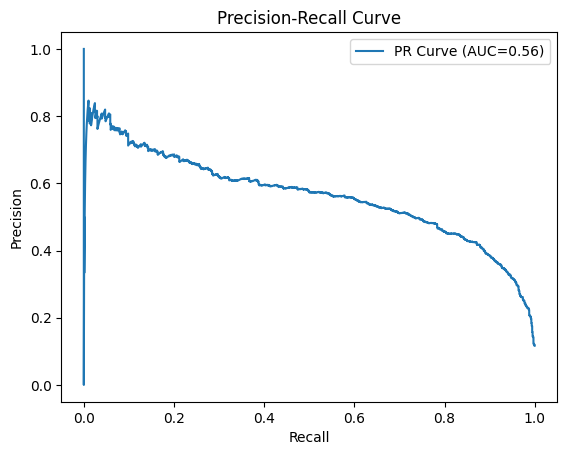

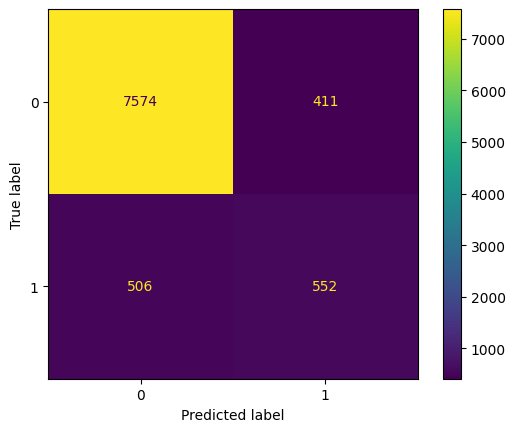

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score
from imblearn.combine import SMOTETomek
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def split_features_and_target(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column].map({'no': 0, 'yes': 1})
    return X, y

def train_test_split_stratified(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

def apply_smote_tomek(X_train, y_train):
    smote_tomek = SMOTETomek(random_state=42)
    return smote_tomek.fit_resample(X_train, y_train)

def train_random_forest(X_train, y_train):
    rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None, class_weight="balanced")
    rf_model.fit(X_train, y_train)
    return rf_model

def train_gradient_boosting(X_train, y_train):
    gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
    gb_model.fit(X_train, y_train)
    return gb_model

def build_and_train_neural_network(X_train, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    nn_model = Sequential([
        Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

    return nn_model, scaler

def train_stacking_ensemble(X_meta_train, y_meta_train):
    meta_model = LogisticRegression(random_state=42, C=1.0, solver='liblinear', class_weight="balanced")
    meta_model.fit(X_meta_train, y_meta_train)
    return meta_model

def evaluate_stacking_ensemble(meta_model, X_meta_test, y_test):
    y_pred_proba = meta_model.predict_proba(X_meta_test)[:, 1]
    y_pred = (y_pred_proba > 0.5).astype(int)

    print("Stacking Ensemble Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Stacking Ensemble ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = average_precision_score(y_test, y_pred_proba)
    print("Precision-Recall AUC:", pr_auc)

    # Visualize Precision-Recall Curve
    plt.plot(recall, precision, label=f"PR Curve (AUC={pr_auc:.2f})")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

def main(df, target_column='y'):
    # Step 1: Split Features and Target
    X, y = split_features_and_target(df, target_column)

    # Step 2: Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split_stratified(X, y)

    # Step 3: Apply SMOTE + Tomek Links
    X_train_resampled, y_train_resampled = apply_smote_tomek(X_train, y_train)
    print("Class distribution after SMOTE + Tomek:")
    print(y_train_resampled.value_counts())

    # Step 4: Train Base Models (Random Forest, Gradient Boosting, and Neural Network)
    rf_model = train_random_forest(X_train_resampled, y_train_resampled)
    gb_model = train_gradient_boosting(X_train_resampled, y_train_resampled)
    nn_model, scaler = build_and_train_neural_network(X_train_resampled, y_train_resampled)

    # Step 5: Prepare Meta-Training Data
    rf_meta_train = rf_model.predict_proba(X_train_resampled)[:, 1].reshape(-1, 1)
    rf_meta_test = rf_model.predict_proba(X_test)[:, 1].reshape(-1, 1)

    gb_meta_train = gb_model.predict_proba(X_train_resampled)[:, 1].reshape(-1, 1)
    gb_meta_test = gb_model.predict_proba(X_test)[:, 1].reshape(-1, 1)

    X_train_resampled_scaled = scaler.transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)
    nn_meta_train = nn_model.predict(X_train_resampled_scaled).ravel().reshape(-1, 1)
    nn_meta_test = nn_model.predict(X_test_scaled).ravel().reshape(-1, 1)

    # Combine Meta-Features
    X_meta_train = np.hstack((rf_meta_train, gb_meta_train, nn_meta_train))
    X_meta_test = np.hstack((rf_meta_test, gb_meta_test, nn_meta_test))

    # Step 6: Train Stacking Meta-Model
    meta_model = train_stacking_ensemble(X_meta_train, y_train_resampled)

    # Step 7: Evaluate Stacking Ensemble
    evaluate_stacking_ensemble(meta_model, X_meta_test, y_test)

# Example usage
main(df_encoded)  # Replace df_encoded with your DataFrame


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTETomek or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.vali

Class distribution after SMOTE + Tomek:
y
0    31082
1    31082
Name: count, dtype: int64
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1555/1555 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8869 - loss: 0.2685 - val_accuracy: 0.9818 - val_loss: 0.0596
Epoch 2/50
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9251 - loss: 0.1758 - val_accuracy: 0.9834 - val_loss: 0.0535
Epoch 3/50
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9260 - loss: 0.1688 - val_accuracy: 0.9780 - val_loss: 0.0652
Epoch 4/50
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9281 - loss: 0.1630 - val_accuracy: 0.9859 - val_loss: 0.0474
Epoch 5/50
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9316 - loss: 0.1580 - val_accuracy: 0.9827 - val_loss: 0.0510
Epoch 6/50
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9313 - loss: 0.1572 - val_accuracy: 0.9904 - val_loss: 0.0369
Epoch 7/50
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9336 - loss: 0.1523 - val_accuracy: 0.9808 - val_loss: 0.0575
Epoch 8/50
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9314 - loss: 0.1567 - val_accurac

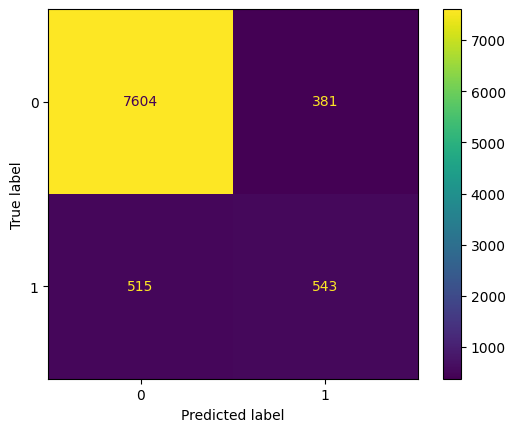

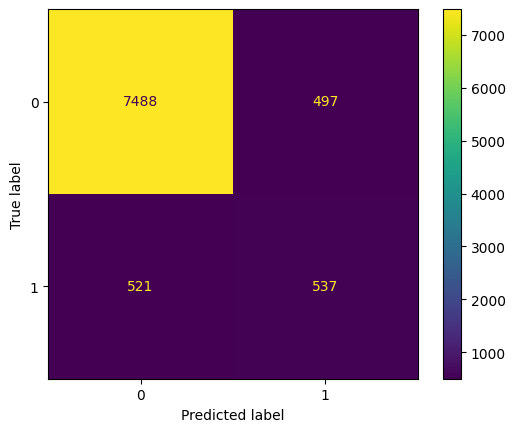

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def split_features_and_target(df, target_column):
    """
    Splits the DataFrame into features and target variable.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the target column.

    Returns:
        X (pd.DataFrame): Features.
        y (pd.Series): Target variable.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column].map({'no': 0, 'yes': 1})
    return X, y

def train_test_split_stratified(X, y, test_size=0.2, random_state=42):
    """
    Splits the data into training and testing sets using stratified sampling.

    Parameters:
        X (pd.DataFrame): Features.
        y (pd.Series): Target variable.
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Random seed for reproducibility.

    Returns:
        X_train, X_test, y_train, y_test: Split datasets.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

def apply_smote_tomek(X_train, y_train):
    """
    Applies SMOTE + Tomek Links to the training data to handle class imbalance.

    Parameters:
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training target variable.

    Returns:
        X_train_resampled, y_train_resampled: Resampled datasets.
    """
    smote_tomek = SMOTETomek(random_state=42)
    return smote_tomek.fit_resample(X_train, y_train)

def train_random_forest(X_train, y_train):
    """
    Trains a Random Forest classifier.

    Parameters:
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training target variable.

    Returns:
        rf_model: Trained Random Forest model.
    """
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model

def build_and_train_neural_network(X_train, y_train):
    """
    Builds and trains a Neural Network.

    Parameters:
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training target variable.

    Returns:
        nn_model: Trained Neural Network model.
        scaler: Fitted StandardScaler instance.
    """
    # Scale features for Neural Network
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Build Neural Network
    nn_model = Sequential([
        Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification output
    ])

    # Compile the Neural Network
    nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the Neural Network
    nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

    return nn_model, scaler

def evaluate_model(model, X_test, y_test, scaler=None, model_type='rf'):
    """
    Evaluates the model and prints classification report and ROC-AUC score.

    Parameters:
        model: The trained model (Random Forest or Neural Network).
        X_test (pd.DataFrame): Test features.
        y_test (pd.Series): Test target variable.
        scaler: Fitted StandardScaler instance (for Neural Network).
        model_type (str): Type of model ('rf' for Random Forest, 'nn' for Neural Network).
    """
    if model_type == 'rf':
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif model_type == 'nn':
        X_test_scaled = scaler.transform(X_test)
        y_pred_proba = model.predict(X_test_scaled)
        y_pred = (y_pred_proba > 0.5).astype(int)

    print(f"{model_type.upper()} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{model_type.upper()} ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

def main(df, target_column='y'):
    """
    Main function to execute the machine learning workflow.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing features and target.
        target_column (str): The name of the target column.
    """
    # Step 1: Split Features and Target
    X, y = split_features_and_target(df, target_column)

    # Step 2: Train-Test Split (Stratified)
    X_train, X_test, y_train, y_test = train_test_split_stratified(X, y)

    # Step 3: Apply SMOTE + Tomek Links
    X_train_resampled, y_train_resampled = apply_smote_tomek(X_train, y_train)
    print("Class distribution after SMOTE + Tomek:")
    print(y_train_resampled.value_counts())

    # Step 4: Train Random Forest
    rf_model = train_random_forest(X_train_resampled, y_train_resampled)

    # Step 5: Train Neural Network
    nn_model, scaler = build_and_train_neural_network(X_train_resampled, y_train_resampled)

    # Step 6: Evaluate Models
    evaluate_model(rf_model, X_test, y_test, model_type='rf')
    evaluate_model(nn_model, X_test, y_test, scaler=scaler, model_type='nn')

# Example usage
# Assuming df is your DataFrame with the target column named 'y'
main(df_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTETomek or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.vali

Class distribution after SMOTE + Tomek:
y
0    30102
1    30102
Name: count, dtype: int64
Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1506/1506 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8933 - loss: 0.2572 - val_accuracy: 0.9704 - val_loss: 0.0677 - learning_rate: 0.0010
Epoch 2/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9264 - loss: 0.1644 - val_accuracy: 0.9791 - val_loss: 0.0449 - learning_rate: 0.0010
Epoch 3/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9289 - loss: 0.1564 - val_accuracy: 0.9759 - val_loss: 0.0547 - learning_rate: 0.0010
Epoch 4/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9321 - loss: 0.1491 - val_accuracy: 0.9763 - val_loss: 0.0513 - learning_rate: 0.0010
Epoch 5/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9321 - loss: 0.1445 - val_accuracy: 0.9787 - val_loss: 0.0479 - learning_rate: 0.0010
Epoch 6/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9349 - loss: 0.1399 - val_accuracy: 0.9814 - val_loss: 0.0431 - learning_rate: 0.0010
Epoch 7/50
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9379 - loss: 0.1339

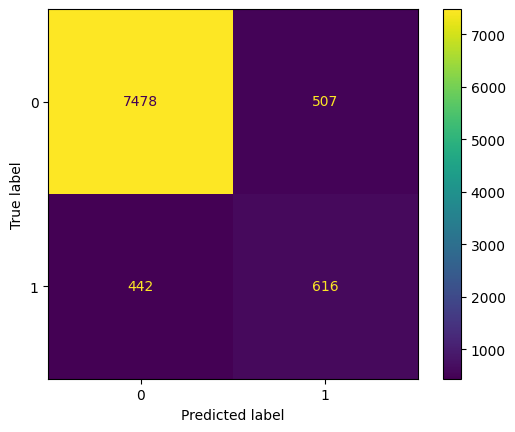

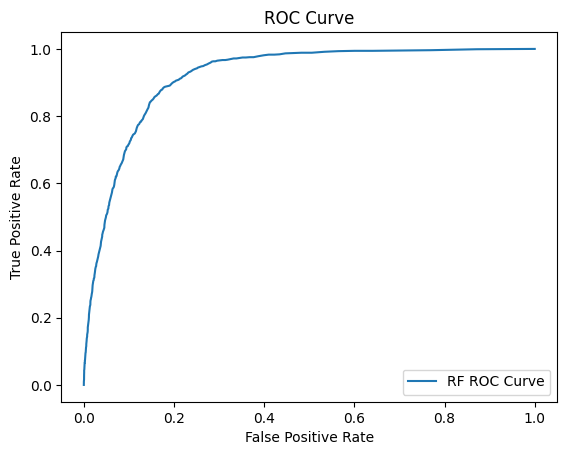

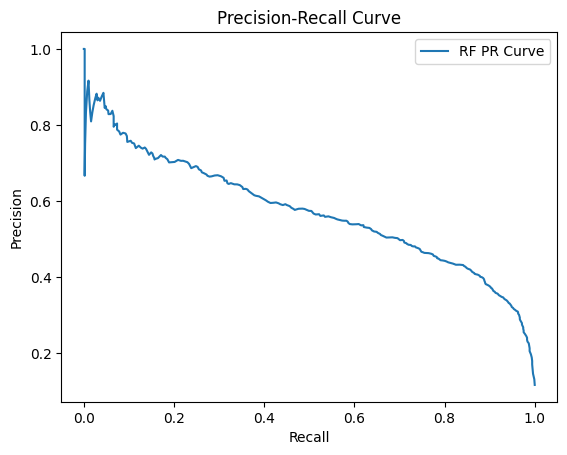

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
NN Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7985
           1       0.54      0.54      0.54      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.74      0.74      9043
weighted avg       0.89      0.89      0.89      9043

NN ROC-AUC Score: 0.9108283134847593


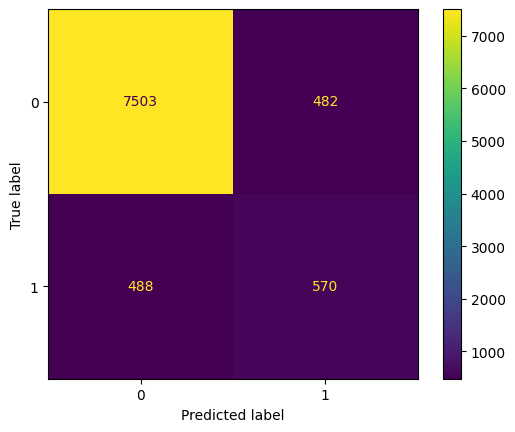

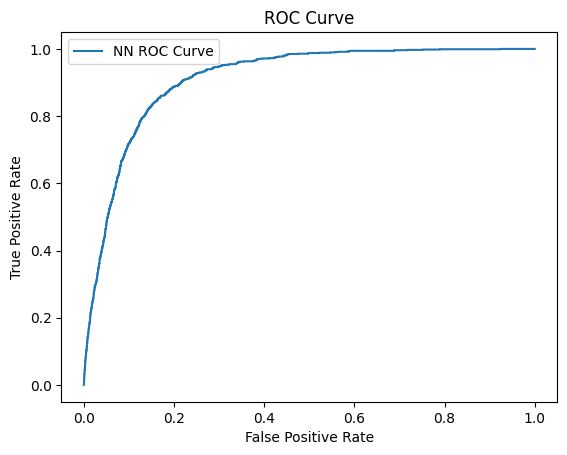

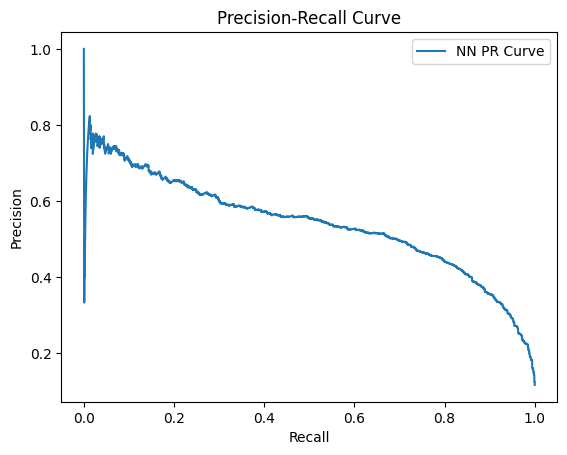

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

def split_features_and_target(df, target_column):
    """
    Splits the DataFrame into features and target variable.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column].map({'no': 0, 'yes': 1})
    return X, y

def train_test_split_stratified(X, y, test_size=0.2, random_state=42):
    """
    Splits the data into training and testing sets using stratified sampling.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

def apply_smote_tomek(X_train, y_train):
    """
    Applies SMOTE + Tomek Links to the training data to handle class imbalance.
    """
    smote_tomek = SMOTETomek(random_state=42)
    return smote_tomek.fit_resample(X_train, y_train)

def feature_engineering(X):
    """
    Adds interaction and polynomial features.
    """
    # Interaction features
    X['balance_duration'] = X['balance'] * X['duration']
    X['age_campaign'] = X['age'] / (X['campaign'] + 1)
    return X

def train_random_forest(X_train, y_train):
    """
    Trains a Random Forest classifier with hyperparameter tuning.
    """
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print("Best Random Forest Parameters:", grid_search.best_params_)
    return grid_search.best_estimator_

def build_and_train_neural_network(X_train, y_train):
    """
    Builds and trains a Neural Network with callbacks.
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    nn_model = Sequential([
        Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

    nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2,
                 callbacks=[early_stopping, lr_scheduler])

    return nn_model, scaler

def evaluate_model(model, X_test, y_test, scaler=None, model_type='rf'):
    """
    Evaluates the model and prints classification report, ROC-AUC score, and curves.
    """
    if model_type == 'rf':
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif model_type == 'nn':
        X_test_scaled = scaler.transform(X_test)
        y_pred_proba = model.predict(X_test_scaled).ravel()
        y_pred = (y_pred_proba > 0.5).astype(int)

    print(f"{model_type.upper()} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{model_type.upper()} ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_type.upper()} ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, label=f'{model_type.upper()} PR Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

def main(df, target_column='y'):
    """
    Main function to execute the machine learning workflow.
    """
    # Step 1: Split Features and Target
    X, y = split_features_and_target(df, target_column)

    # Step 2: Train-Test Split (Stratified)
    X_train, X_test, y_train, y_test = train_test_split_stratified(X, y)

    # Step 3: Feature Engineering
    X_train = feature_engineering(X_train)
    X_test = feature_engineering(X_test)

    # Step 4: Apply SMOTE + Tomek Links
    X_train_resampled, y_train_resampled = apply_smote_tomek(X_train, y_train)
    print("Class distribution after SMOTE + Tomek:")
    print(y_train_resampled.value_counts())

    # Step 5: Train Random Forest
    rf_model = train_random_forest(X_train_resampled, y_train_resampled)

    # Step 6: Train Neural Network
    nn_model, scaler = build_and_train_neural_network(X_train_resampled, y_train_resampled)

    # Step 7: Evaluate Models
    evaluate_model(rf_model, X_test, y_test, model_type='rf')
    evaluate_model(nn_model, X_test, y_test, scaler=scaler, model_type='nn')

# Example usage
# Assuming df_encoded is your preprocessed DataFrame
main(df_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTETomek or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.vali

Class distribution after SMOTE + Tomek:
y
0    31081
1    31081
Name: count, dtype: int64
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1555/1555 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8941 - loss: 0.2511 - val_accuracy: 0.9716 - val_loss: 0.0742
Epoch 2/50
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9242 - loss: 0.1680 - val_accuracy: 0.9780 - val_loss: 0.0571
Epoch 3/50
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9273 - loss: 0.1606 - val_accuracy: 0.9743 - val_loss: 0.0659
Epoch 4/50
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9298 - loss: 0.1532 - val_accuracy: 0.9793 - val_loss: 0.0524
Epoch 5/50
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9309 - loss: 0.1504 - val_accuracy: 0.9782 - val_loss: 0.0532
Epoch 6/50
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9357 - loss: 0.1437 - val_accuracy: 0.9753 - val_loss: 0.0554
Epoch 7/50
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9383 - loss: 0.1403 - val_accuracy: 0.9768 - val_loss: 0.0529
Epoch 8/50
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9378 - loss: 0.1372 - val_accurac

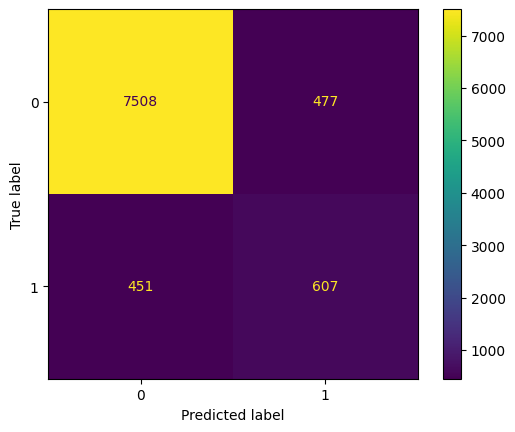

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
from imblearn.combine import SMOTETomek
import numpy as np

def split_features_and_target(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column].map({'no': 0, 'yes': 1})
    return X, y

def train_test_split_stratified(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

def apply_smote_tomek(X_train, y_train):
    smote_tomek = SMOTETomek(random_state=42)
    return smote_tomek.fit_resample(X_train, y_train)

def train_random_forest(X_train, y_train):
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model

def build_and_train_neural_network(X_train, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    nn_model = Sequential([
        Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    from tensorflow.keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

    return nn_model, scaler

def train_stacking_ensemble(X_train, y_train, X_meta_train, y_meta_train):
    """
    Trains a meta-model (stacking ensemble) using outputs of base models.
    """
    meta_model = LogisticRegression(random_state=42)
    meta_model.fit(X_meta_train, y_meta_train)
    return meta_model

def evaluate_stacking_ensemble(meta_model, X_meta_test, y_test):
    """
    Evaluates the stacking ensemble model.
    """
    y_pred_proba = meta_model.predict_proba(X_meta_test)[:, 1]
    y_pred = (y_pred_proba > 0.5).astype(int)

    print("Stacking Ensemble Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Stacking Ensemble ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

def main(df, target_column='y'):
    # Step 1: Split Features and Target
    X, y = split_features_and_target(df, target_column)

    # Step 2: Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split_stratified(X, y)

    # Step 3: Apply SMOTE + Tomek Links
    X_train_resampled, y_train_resampled = apply_smote_tomek(X_train, y_train)
    print("Class distribution after SMOTE + Tomek:")
    print(y_train_resampled.value_counts())

    # Step 4: Train Base Models (Random Forest and Neural Network)
    rf_model = train_random_forest(X_train_resampled, y_train_resampled)
    nn_model, scaler = build_and_train_neural_network(X_train_resampled, y_train_resampled)

    # Step 5: Prepare Meta-Training Data
    # Random Forest Predictions
    rf_meta_train = rf_model.predict_proba(X_train_resampled)[:, 1].reshape(-1, 1)
    rf_meta_test = rf_model.predict_proba(X_test)[:, 1].reshape(-1, 1)

    # Neural Network Predictions
    X_train_resampled_scaled = scaler.transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)
    nn_meta_train = nn_model.predict(X_train_resampled_scaled).ravel().reshape(-1, 1)
    nn_meta_test = nn_model.predict(X_test_scaled).ravel().reshape(-1, 1)

    # Combine Meta-Features
    X_meta_train = np.hstack((rf_meta_train, nn_meta_train))
    X_meta_test = np.hstack((rf_meta_test, nn_meta_test))

    # Step 6: Train Stacking Meta-Model
    meta_model = train_stacking_ensemble(X_train_resampled, y_train_resampled, X_meta_train, y_train_resampled)

    # Step 7: Evaluate Stacking Ensemble
    evaluate_stacking_ensemble(meta_model, X_meta_test, y_test)

# Example usage
main(df_encoded)


In [ ]:
from imblearn.combine import SMOTEENN
import pandas as pd

def split_features_and_target(df, target_column='y'):
    """
    Splits the dataset into features and target.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column].map({'no': 0, 'yes': 1})  # Convert target to binary
    return X, y

def apply_smote_enn(X, y):
    """
    Applies SMOTE-ENN for class balancing.
    """
    smote_enn = SMOTEENN(random_state=42)
    X_resampled, y_resampled = smote_enn.fit_resample(X, y)
    return X_resampled, y_resampled

# Load your dataset
# Assuming `df_encoded` is the preprocessed dataset with the target column named 'y'
df = df_encoded

# Step 1: Split Features and Target
X, y = split_features_and_target(df)

# Step 2: Apply SMOTE-ENN for Balancing
X_resampled, y_resampled = apply_smote_enn(X, y)

# Step 3: Verify Class Distribution
print("Class distribution before balancing:")
print(y.value_counts())

print("Class distribution after balancing:")
print(pd.Series(y_resampled).value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Class distribution before balancing:
y
0    39922
1     5289
Name: count, dtype: int64
Class distribution after balancing:
y
1    34536
0    27947
Name: count, dtype: int64


#rf and nn seperated

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def split_features_and_target(df, target_column):
    """
    Splits the DataFrame into features and target variable.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the target column.

    Returns:
        X (pd.DataFrame): Features.
        y (pd.Series): Target variable.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column].map({'no': 0, 'yes': 1})
    return X, y

def train_test_split_stratified(X, y, test_size=0.2, random_state=42):
    """
    Splits the data into training and testing sets using stratified sampling.

    Parameters:
        X (pd.DataFrame): Features.
        y (pd.Series): Target variable.
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Random seed for reproducibility.

    Returns:
        X_train, X_test, y_train, y_test: Split datasets.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

def apply_smote_tomek(X_train, y_train):
    """
    Applies SMOTE + Tomek Links to the training data to handle class imbalance.

    Parameters:
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training target variable.

    Returns:
        X_train_resampled, y_train_resampled: Resampled datasets.
    """
    smote_tomek = SMOTETomek(random_state=42)
    return smote_tomek.fit_resample(X_train, y_train)

def train_random_forest(X_train, y_train):
    """
    Trains a Random Forest classifier.

    Parameters:
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training target variable.

    Returns:
        rf_model: Trained Random Forest model.
    """
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model



def evaluate_model(model, X_test, y_test, scaler=None, model_type='rf'):
    """
    Evaluates the model and prints classification report and ROC-AUC score.

    Parameters:
        model: The trained model (Random Forest or Neural Network).
        X_test (pd.DataFrame): Test features.
        y_test (pd.Series): Test target variable.
        scaler: Fitted StandardScaler instance (for Neural Network).
        model_type (str): Type of model ('rf' for Random Forest, 'nn' for Neural Network).
    """
    if model_type == 'rf':
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif model_type == 'nn':
        X_test_scaled = scaler.transform(X_test)
        y_pred_proba = model.predict(X_test_scaled)
        y_pred = (y_pred_proba > 0.5).astype(int)

    print(f"{model_type.upper()} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{model_type.upper()} ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

def run_random_forest_workflow(df, target_column='y'):
    """
    Executes the workflow for Random Forest.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing features and target.
        target_column (str): The name of the target column.
    """
    X, y = split_features_and_target(df, target_column)
    X_train, X_test, y_train, y_test = train_test_split_stratified(X, y)
    X_train_resampled, y_train_resampled = apply_smote_tomek(X_train, y_train)
    rf_model = train_random_forest(X_train_resampled, y_train_resampled)
    evaluate_model(rf_model, X_test, y_test, model_type='rf')




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTETomek or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.vali

RF Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7985
           1       0.59      0.51      0.55      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.73      0.75      9043
weighted avg       0.90      0.90      0.90      9043

RF ROC-AUC Score: 0.9207566053079204


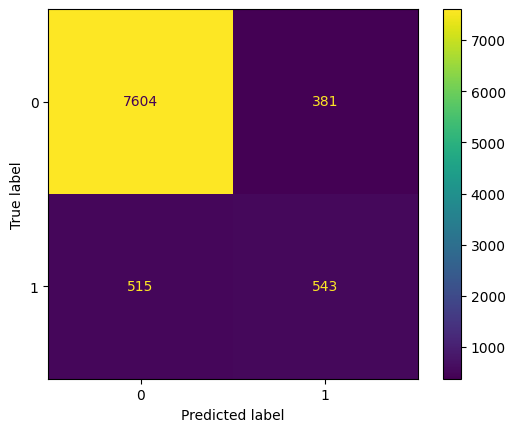

In [8]:
run_random_forest_workflow(df_encoded)

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

def split_features_and_target(df, target_column):
    """
    Splits the DataFrame into features and target variable.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the target column.

    Returns:
        X (pd.DataFrame): Features.
        y (pd.Series): Target variable.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column].map({'no': 0, 'yes': 1})
    return X, y

def train_test_split_stratified(X, y, test_size=0.2, random_state=42):
    """
    Splits the data into training and testing sets using stratified sampling.

    Parameters:
        X (pd.DataFrame): Features.
        y (pd.Series): Target variable.
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Random seed for reproducibility.

    Returns:
        X_train, X_test, y_train, y_test: Split datasets.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

def build_neural_network(X_train, neurons_layer1=160, dropout_rate=0.4, regularization=l2(0.5)):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    nn_model = Sequential([
        Dense(neurons_layer1, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=regularization),
        Dropout(dropout_rate),
        Dense(128, activation='relu', kernel_regularizer=regularization),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return nn_model, scaler


def evaluate_neural_network(model, X_test, y_test, scaler):
    """
    Evaluates the Neural Network and prints classification report.

    Parameters:
        model: Trained Neural Network model.
        X_test (pd.DataFrame): Test features.
        y_test (pd.Series): Test target variable.
        scaler: Fitted StandardScaler instance.
    """
    X_test_scaled = scaler.transform(X_test)
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = (y_pred_proba > 0.5).astype(int)

    print("Neural Network Classification Report:")
    print(classification_report(y_test, y_pred))

    final_accuracy = accuracy_score(y_test, y_pred)
    print(f"Final Accuracy: {final_accuracy:.4f}")

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

    return final_accuracy

def run_neural_network_workflow(df, target_column='y'):
    """
    Executes the workflow for Neural Network.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing features and target.
        target_column (str): The name of the target column.
    """
    X, y = split_features_and_target(df, target_column)
    X_train, X_test, y_train, y_test = train_test_split_stratified(X, y)
    nn_model, scaler = build_and_train_neural_network(X_train, y_train)
    final_accuracy = evaluate_neural_network(nn_model, X_test, y_test, scaler)

    print("Summary of Parameters:")
    print(f"Learning Rate: 0.001")
    print(f"Batch Size: 32")
    print(f"Neurons (Layer 1): 64")
    print(f"Dropout Rate: 0.3")
    print(f"Regularization: None")
    print(f"Final Accuracy (Test): {final_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - AUC: 0.7408 - Precision: 0.4132 - Recall: 0.2101 - accuracy: 0.8644 - loss: 1.1513 - val_AUC: 0.9124 - val_Precision: 0.6137 - val_Recall: 0.4057 - val_accuracy: 0.9016 - val_loss: 0.2973
Epoch 2/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8973 - Precision: 0.6337 - Recall: 0.3690 - accuracy: 0.9001 - loss: 0.2889 - val_AUC: 0.9096 - val_Precision: 0.6196 - val_Recall: 0.4296 - val_accuracy: 0.9034 - val_loss: 0.2529
Epoch 3/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.8955 - Precision: 0.6091 - Recall: 0.3772 - accuracy: 0.9006 - loss: 0.2608 - val_AUC: 0.9067 - val_Precision: 0.5894 - val_Recall: 0.4797 - val_accuracy: 0.9010 - val_loss: 0.2526
Epoch 4/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8991 - Precision: 0.6088 - Recall: 0.3914 - accuracy: 0.9002 - loss: 0.2557 - val_AUC: 0.9107 - val_Precision: 0.6192 - val_Recall: 0.3842 - val_accuracy: 0.9013 - val_loss: 0.2457
Epoch 5/50
453/453 ━━━━━━━━━━━━━

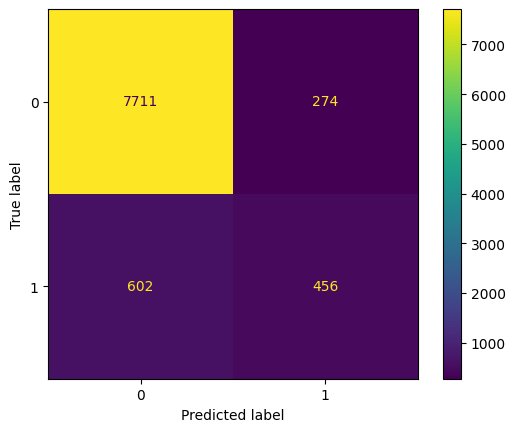

Summary of Parameters:
Learning Rate: 0.001
Batch Size: 32
Neurons (Layer 1): 64
Dropout Rate: 0.3
Regularization: None
Final Accuracy (Test): 0.9031


In [19]:
run_neural_network_workflow(df_encoded)

Trial 10 Complete [00h 01m 48s]
val_accuracy: 0.987005889415741

Best val_accuracy So Far: 0.9923287630081177
Total elapsed time: 00h 17m 59s
Best hyperparameters found: {'units_layer1': 192, 'dropout_rate': 0.2, 'units_layer2': 128}
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      7985
           1       0.16      0.31      0.21      1058

    accuracy                           0.73      9043
   macro avg       0.53      0.55      0.53      9043
weighted avg       0.81      0.73      0.76      9043

Final Accuracy: 0.7298


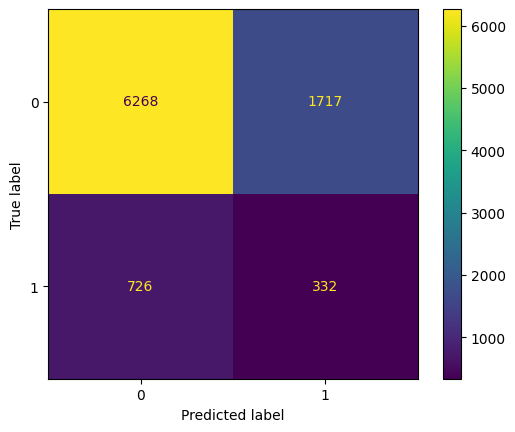

Final Model Performance:
Final Accuracy (Test): 0.7298


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9209 - Precision: 0.8625 - Recall: 0.7281 - accuracy: 0.8592 - loss: 0.9304 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9715 - val_accuracy: 0.9715 - val_loss: 0.1476 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9689 - Precision: 0.9050 - Recall: 0.8608 - accuracy: 0.9151 - loss: 0.2579 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9754 - val_accuracy: 0.9754 - val_loss: 0.1217 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9693 - Precision: 0.8991 - Recall: 0.8609 - accuracy: 0.9117 - loss: 0.2479 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9829 - val_accuracy: 0.9829 - val_loss: 0.0970 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9709 - Precision: 0.9013 - Recall: 0.8632 - accuracy: 0.9124 - loss: 0.2414 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.97

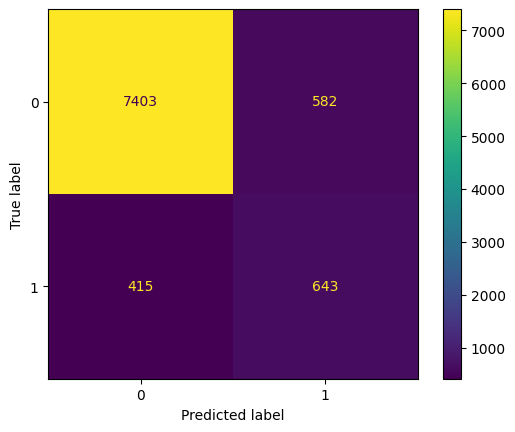

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - AUC: 0.9345 - Precision: 0.8784 - Recall: 0.7701 - accuracy: 0.8746 - loss: 0.9172 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9837 - val_accuracy: 0.9837 - val_loss: 0.1237 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9685 - Precision: 0.9022 - Recall: 0.8636 - accuracy: 0.9139 - loss: 0.2610 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9776 - val_accuracy: 0.9776 - val_loss: 0.1195 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9694 - Precision: 0.9029 - Recall: 0.8589 - accuracy: 0.9116 - loss: 0.2484 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9750 - val_accuracy: 0.9750 - val_loss: 0.1101 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9710 - Precision: 0.9019 - Recall: 0.8663 - accuracy: 0.9142 - loss: 0.2384 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.98

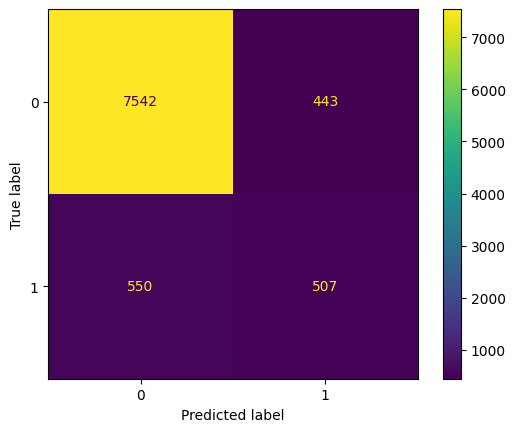

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - AUC: 0.9222 - Precision: 0.8605 - Recall: 0.7624 - accuracy: 0.8628 - loss: 0.9326 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9800 - val_accuracy: 0.9800 - val_loss: 0.1297 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9676 - Precision: 0.9032 - Recall: 0.8614 - accuracy: 0.9131 - loss: 0.2632 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9760 - val_accuracy: 0.9760 - val_loss: 0.1233 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9703 - Precision: 0.9048 - Recall: 0.8656 - accuracy: 0.9147 - loss: 0.2451 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9804 - val_accuracy: 0.9804 - val_loss: 0.1145 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9719 - Precision: 0.9050 - Recall: 0.8685 - accuracy: 0.9163 - loss: 0.2361 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.98

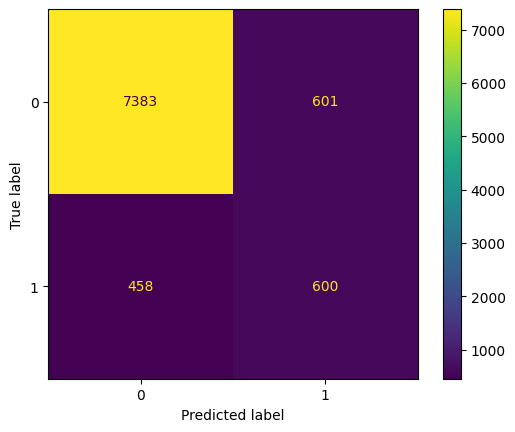

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9220 - Precision: 0.8588 - Recall: 0.7730 - accuracy: 0.8651 - loss: 0.9633 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9774 - val_accuracy: 0.9774 - val_loss: 0.1451 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - AUC: 0.9689 - Precision: 0.9051 - Recall: 0.8643 - accuracy: 0.9155 - loss: 0.2585 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9797 - val_accuracy: 0.9797 - val_loss: 0.1163 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9710 - Precision: 0.9007 - Recall: 0.8668 - accuracy: 0.9148 - loss: 0.2435 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9778 - val_accuracy: 0.9778 - val_loss: 0.1115 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9704 - Precision: 0.9048 - Recall: 0.8617 - accuracy: 0.9139 - loss: 0.2424 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.97

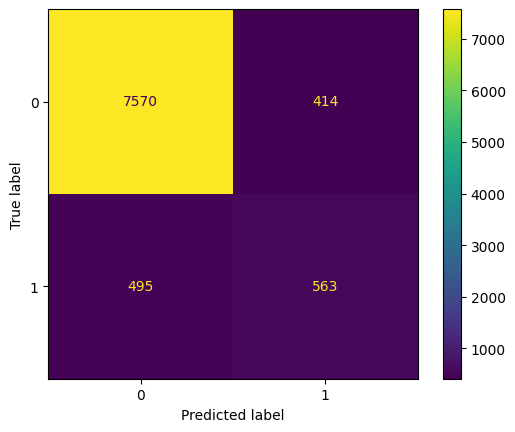

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.9275 - Precision: 0.8688 - Recall: 0.7551 - accuracy: 0.8676 - loss: 0.9429 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9643 - val_accuracy: 0.9643 - val_loss: 0.1770 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - AUC: 0.9688 - Precision: 0.9030 - Recall: 0.8593 - accuracy: 0.9124 - loss: 0.2609 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9807 - val_accuracy: 0.9807 - val_loss: 0.1095 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9708 - Precision: 0.9022 - Recall: 0.8664 - accuracy: 0.9152 - loss: 0.2432 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9845 - val_accuracy: 0.9845 - val_loss: 0.0938 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9721 - Precision: 0.9067 - Recall: 0.8671 - accuracy: 0.9169 - loss: 0.2356 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.97

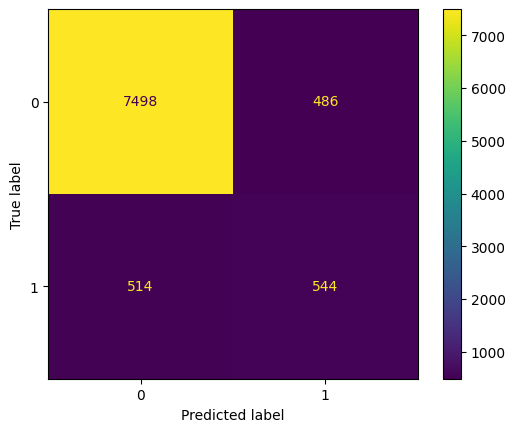

Cross-Validation Accuracy: 0.8903


In [11]:
!pip install tensorflow
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from kerastuner.tuners import RandomSearch
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


def split_features_and_target(df, target_column):
    """
    Splits the DataFrame into features and target variable.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column].map({'no': 0, 'yes': 1})
    return X, y


def train_test_split_stratified(X, y, test_size=0.2, random_state=42):
    """
    Splits the data into training and testing sets using stratified sampling.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)


def build_and_train_neural_network(X_train, y_train, neurons_layer1=128, dropout_rate=0.3, regularization=l2(0.01), lr_scheduler=None):
    """
    Builds and trains a neural network with the provided hyperparameters.
    """
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Build neural network
    nn_model = Sequential([
        Dense(neurons_layer1, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=regularization),
        Dropout(dropout_rate),
        Dense(64, activation='relu', kernel_regularizer=regularization),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

    # Train neural network
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    callbacks = [early_stopping]
    if lr_scheduler:
        callbacks.append(lr_scheduler)

    nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=callbacks)

    return nn_model, scaler


def evaluate_neural_network(model, X_test, y_test, scaler):
    """
    Evaluates the Neural Network and prints classification report.
    """
    X_test_scaled = scaler.transform(X_test)
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = (y_pred_proba > 0.5).astype(int)

    print("Neural Network Classification Report:")
    print(classification_report(y_test, y_pred))

    final_accuracy = accuracy_score(y_test, y_pred)
    print(f"Final Accuracy: {final_accuracy:.4f}")

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

    return final_accuracy


def hyperparameter_tuning(X_train, y_train):
    """
    Performs hyperparameter tuning using KerasTuner.
    """
    def build_tuned_model(hp):
        model = Sequential([
            Dense(hp.Int('units_layer1', min_value=64, max_value=256, step=32), activation='relu', input_dim=X_train_scaled.shape[1]),
            Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)),
            Dense(hp.Int('units_layer2', min_value=32, max_value=128, step=32), activation='relu'),
            Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])
        return model

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    tuner = RandomSearch(
        build_tuned_model,
        objective='val_accuracy',
        max_trials=10,
        executions_per_trial=1,
        directory='tuner_results',
        project_name='nn_hyperparam_tuning'
    )
    tuner.search(X_train_scaled, y_train, epochs=20, validation_split=0.2, callbacks=[EarlyStopping(patience=5)])
    best_hyperparameters = tuner.get_best_hyperparameters()[0]
    print("Best hyperparameters found:", best_hyperparameters.values)
    best_model = tuner.hypermodel.build(best_hyperparameters)
    return best_model, scaler


def run_neural_network_workflow(df, target_column='y'):
    """
    Executes the workflow for Neural Network.
    """
    X, y = split_features_and_target(df, target_column)
    X_train, X_test, y_train, y_test = train_test_split_stratified(X, y)

    # Address class imbalance with SMOTE
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Learning Rate Scheduler
    def scheduler(epoch, lr):
        if epoch < 10:
            return lr
        else:
            return lr * tf.math.exp(-0.1).numpy()

    lr_scheduler = LearningRateScheduler(scheduler)

    # Perform hyperparameter tuning
    best_model, scaler = hyperparameter_tuning(X_train, y_train)

    # Evaluate tuned model
    final_accuracy = evaluate_neural_network(best_model, X_test, y_test, scaler)

    print("Final Model Performance:")
    print(f"Final Accuracy (Test): {final_accuracy:.4f}")

    # Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in skf.split(X, y):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        X_train_cv, y_train_cv = smote.fit_resample(X_train_cv, y_train_cv)
        model_cv, scaler_cv = build_and_train_neural_network(X_train_cv, y_train_cv, lr_scheduler=lr_scheduler)
        accuracy = evaluate_neural_network(model_cv, X_test_cv, y_test_cv, scaler_cv)
        accuracies.append(accuracy)

    print(f"Cross-Validation Accuracy: {np.mean(accuracies):.4f}")


# Example usage
# df = pd.read_csv('your_dataset.csv')  # Replace with actual dataset
run_neural_network_workflow(df_encoded, target_column='y')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Reloading Tuner from tuner_results/nn_hyperparam_tuning/tuner0.json

Summary of all tuned models:
Trial ID: 01
Hyperparameters: {'units_layer1': 128, 'dropout_rate': 0.5, 'units_layer2': 32}
Final Loss: 0.9819960594177246
Trial ID: 04
Hyperparameters: {'units_layer1': 64, 'dropout_rate': 0.5, 'units_layer2': 96}
Final Loss: 0.9845010042190552
Trial ID: 05
Hyperparameters: {'units_layer1': 256, 'dropout_rate': 0.4, 'units_layer2': 32}
Final Loss: 0.9850489497184753
Trial ID: 08
Hyperparameters: {'units_layer1': 128, 'dropout_rate': 0.2, 'units_layer2': 128}
Final Loss: 0.9867710471153259
Trial ID: 09
Hyperparameters: {'units_layer1': 128, 'dropout_rate': 0.30000000000000004, 'units_layer2': 128}
Final Loss: 0.987005889415741
Trial ID: 06
Hyperparameters: {'units_layer1': 224, 'dropout_rate': 0.1, 'units_layer2': 128}
Final Loss: 0.9876320958137512
Trial ID: 02
Hyperparameters: {'units_layer1': 192, 'dropout_rate': 0.2, 'units_layer2': 96}
Final Loss: 0.9883366227149963
Trial ID: 00
Hype

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8961 - Precision: 0.8325 - Recall: 0.7355 - accuracy: 0.8461 - loss: 0.3736 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9728 - val_accuracy: 0.9728 - val_loss: 0.0723
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9657 - Precision: 0.9136 - Recall: 0.8411 - accuracy: 0.9120 - loss: 0.2205 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9715 - val_accuracy: 0.9715 - val_loss: 0.0686
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9710 - Precision: 0.9153 - Recall: 0.8434 - accuracy: 0.9131 - loss: 0.2049 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9763 - val_accuracy: 0.9763 - val_loss: 0.0599
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9731 - Precision: 0.9156 - Recall: 0.8508 - accuracy: 0.9147 - loss: 0.1985 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9766 - val_accuracy: 0.9766 - val_loss: 0.0571
Epoch 5/50
799/7

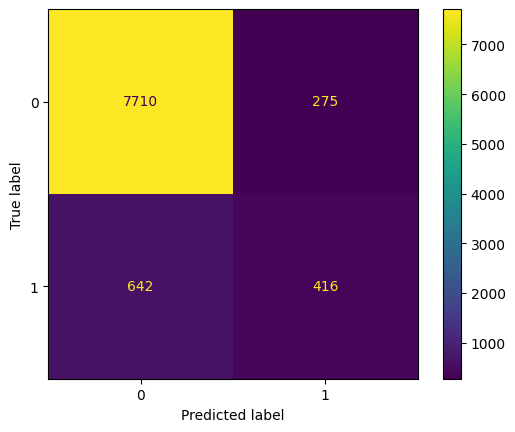

Final Model Performance:
Final Accuracy (Test): 0.8986


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - AUC: 0.9353 - Precision: 0.8798 - Recall: 0.7776 - accuracy: 0.8767 - loss: 0.9176 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9757 - val_accuracy: 0.9757 - val_loss: 0.1461 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - AUC: 0.9683 - Precision: 0.9003 - Recall: 0.8593 - accuracy: 0.9114 - loss: 0.2610 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9825 - val_accuracy: 0.9825 - val_loss: 0.1036 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9700 - Precision: 0.9029 - Recall: 0.8613 - accuracy: 0.9142 - loss: 0.2451 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9775 - val_accuracy: 0.9775 - val_loss: 0.1126 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9708 - Precision: 0.8999 - Recall: 0.8633 - accuracy: 0.9135 - loss: 0.2399 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.97

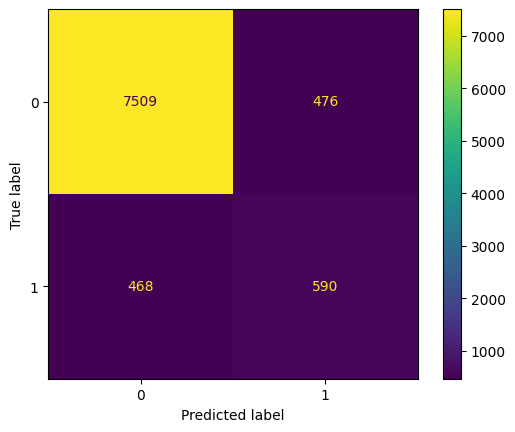

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - AUC: 0.9158 - Precision: 0.8549 - Recall: 0.7456 - accuracy: 0.8566 - loss: 0.9520 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9756 - val_accuracy: 0.9756 - val_loss: 0.1440 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9685 - Precision: 0.9060 - Recall: 0.8639 - accuracy: 0.9156 - loss: 0.2585 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9811 - val_accuracy: 0.9811 - val_loss: 0.1120 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.9700 - Precision: 0.9059 - Recall: 0.8639 - accuracy: 0.9149 - loss: 0.2442 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9712 - val_accuracy: 0.9712 - val_loss: 0.1317 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9700 - Precision: 0.8983 - Recall: 0.8641 - accuracy: 0.9126 - loss: 0.2425 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.97

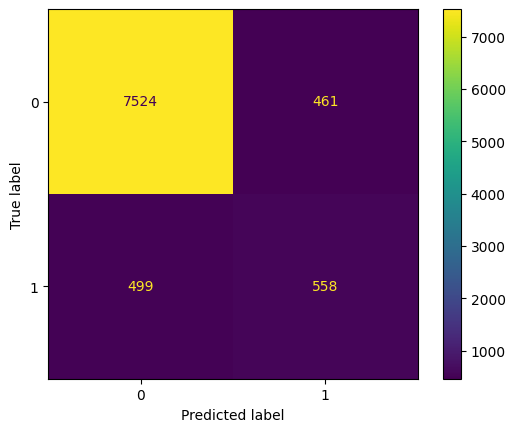

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - AUC: 0.9329 - Precision: 0.8868 - Recall: 0.7692 - accuracy: 0.8763 - loss: 0.8969 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9761 - val_accuracy: 0.9761 - val_loss: 0.1443 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9687 - Precision: 0.9051 - Recall: 0.8637 - accuracy: 0.9152 - loss: 0.2578 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9739 - val_accuracy: 0.9739 - val_loss: 0.1325 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9707 - Precision: 0.9078 - Recall: 0.8665 - accuracy: 0.9171 - loss: 0.2435 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9799 - val_accuracy: 0.9799 - val_loss: 0.1021 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - AUC: 0.9718 - Precision: 0.9065 - Recall: 0.8684 - accuracy: 0.9176 - loss: 0.2364 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.98

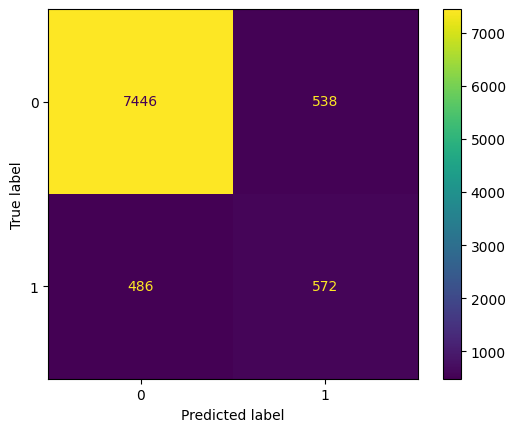

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.9282 - Precision: 0.8682 - Recall: 0.7733 - accuracy: 0.8700 - loss: 0.9362 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9724 - val_accuracy: 0.9724 - val_loss: 0.1497 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9681 - Precision: 0.9009 - Recall: 0.8563 - accuracy: 0.9114 - loss: 0.2627 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9788 - val_accuracy: 0.9788 - val_loss: 0.1055 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9695 - Precision: 0.8997 - Recall: 0.8630 - accuracy: 0.9125 - loss: 0.2481 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9712 - val_accuracy: 0.9712 - val_loss: 0.1235 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9694 - Precision: 0.9013 - Recall: 0.8588 - accuracy: 0.9124 - loss: 0.2438 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.97

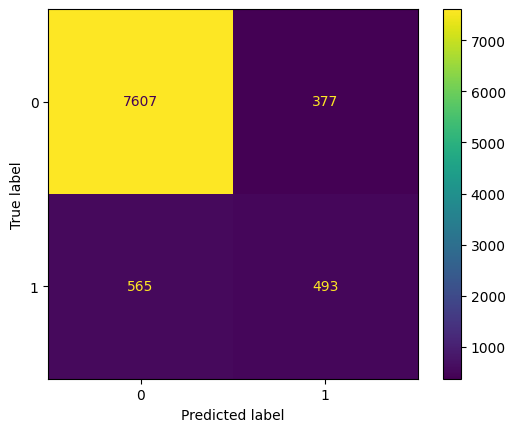

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9260 - Precision: 0.8656 - Recall: 0.7554 - accuracy: 0.8672 - loss: 0.9179 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9771 - val_accuracy: 0.9771 - val_loss: 0.1499 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - AUC: 0.9685 - Precision: 0.9021 - Recall: 0.8627 - accuracy: 0.9125 - loss: 0.2614 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9721 - val_accuracy: 0.9721 - val_loss: 0.1368 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9707 - Precision: 0.9032 - Recall: 0.8641 - accuracy: 0.9141 - loss: 0.2451 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9850 - val_accuracy: 0.9850 - val_loss: 0.0987 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9716 - Precision: 0.9017 - Recall: 0.8680 - accuracy: 0.9142 - loss: 0.2391 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.97

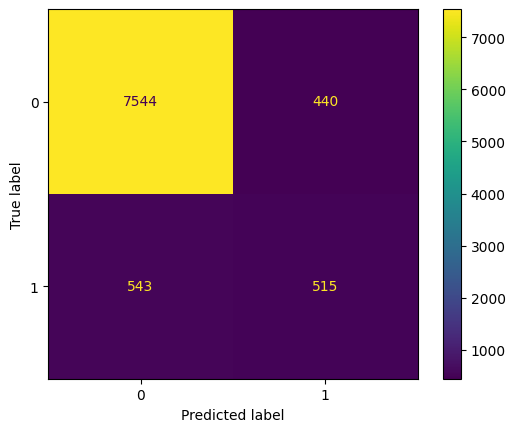

Cross-Validation Accuracy: 0.8927


In [20]:
!pip install tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from kerastuner.tuners import RandomSearch
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

def split_features_and_target(df, target_column):
    """
    Splits the DataFrame into features and target variable.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column].map({'no': 0, 'yes': 1})
    return X, y

def train_test_split_stratified(X, y, test_size=0.2, random_state=42):
    """
    Splits the data into training and testing sets using stratified sampling.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

def build_and_train_neural_network(X_train, y_train, neurons_layer1=128, dropout_rate=0.3, regularization=l2(0.01), lr_scheduler=None):
    """
    Builds and trains a neural network with the provided hyperparameters.
    """
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Build neural network
    nn_model = Sequential([
        Dense(neurons_layer1, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=regularization),
        Dropout(dropout_rate),
        Dense(64, activation='relu', kernel_regularizer=regularization),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

    # Train neural network
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    callbacks = [early_stopping]
    if lr_scheduler:
        callbacks.append(lr_scheduler)

    nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=callbacks)

    return nn_model, scaler

def evaluate_neural_network(model, X_test, y_test, scaler):
    """
    Evaluates the Neural Network and prints classification report.
    """
    X_test_scaled = scaler.transform(X_test)
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = (y_pred_proba > 0.5).astype(int)

    print("Neural Network Classification Report:")
    print(classification_report(y_test, y_pred))

    final_accuracy = accuracy_score(y_test, y_pred)
    print(f"Final Accuracy: {final_accuracy:.4f}")

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

    return final_accuracy

def hyperparameter_tuning(X_train, y_train):
    """
    Performs hyperparameter tuning using KerasTuner.
    Logs each tuned model's details to the console.
    """
    def build_tuned_model(hp):
        model = Sequential([
            Dense(hp.Int('units_layer1', min_value=64, max_value=256, step=32), activation='relu', input_dim=X_train_scaled.shape[1]),
            Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)),
            Dense(hp.Int('units_layer2', min_value=32, max_value=128, step=32), activation='relu'),
            Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])
        return model

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    tuner = RandomSearch(
        build_tuned_model,
        objective='val_loss',  # Change from val_accuracy to val_loss for better generalization
        max_trials=10,
        executions_per_trial=1,
        directory='tuner_results',
        project_name='nn_hyperparam_tuning'
    )

    tuner.search(X_train_scaled, y_train, epochs=20, validation_split=0.2, callbacks=[EarlyStopping(patience=5)])

    print("\nSummary of all tuned models:")
    for trial in tuner.oracle.get_best_trials(num_trials=10):
        print(f"Trial ID: {trial.trial_id}")
        print(f"Hyperparameters: {trial.hyperparameters.values}")
        print(f"Final Loss: {trial.score}")

    best_hyperparameters = tuner.get_best_hyperparameters()[0]
    print("Best hyperparameters found:", best_hyperparameters.values)
    best_model = tuner.hypermodel.build(best_hyperparameters)
    return best_model, scaler

def run_neural_network_workflow(df, target_column='y'):
    """
    Executes the workflow for Neural Network.
    """
    X, y = split_features_and_target(df, target_column)
    X_train, X_test, y_train, y_test = train_test_split_stratified(X, y)

    # Address class imbalance with SMOTE
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Learning Rate Scheduler
    def scheduler(epoch, lr):
        if epoch < 10:
            return lr
        else:
            return lr * tf.math.exp(-0.1).numpy()

    lr_scheduler = LearningRateScheduler(scheduler)

    # Perform hyperparameter tuning
    best_model, scaler = hyperparameter_tuning(X_train, y_train)

    # Train the best model on the full training data
    best_model.fit(scaler.transform(X_train), y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

    # Evaluate tuned model
    final_accuracy = evaluate_neural_network(best_model, X_test, y_test, scaler)

    print("Final Model Performance:")
    print(f"Final Accuracy (Test): {final_accuracy:.4f}")

    # Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in skf.split(X, y):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        X_train_cv, y_train_cv = smote.fit_resample(X_train_cv, y_train_cv)
        model_cv, scaler_cv = build_and_train_neural_network(X_train_cv, y_train_cv, lr_scheduler=lr_scheduler)
        accuracy = evaluate_neural_network(model_cv, X_test_cv, y_test_cv, scaler_cv)
        accuracies.append(accuracy)

    print(f"Cross-Validation Accuracy: {np.mean(accuracies):.4f}")


# Example usage
# df = pd.read_csv('your_dataset.csv')  # Replace with actual dataset
run_neural_network_workflow(df_encoded, target_column='y')


In [ ]:



def split_features_and_target(df, target_column):
    """
    Splits the DataFrame into features and target variable.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column].map({'no': 0, 'yes': 1})
    return X, y


def train_test_split_stratified(X, y, test_size=0.2, random_state=42):
    """
    Splits the data into training and testing sets using stratified sampling.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)




In [26]:
def build_and_train_neural_network(
    X_train, y_train, neurons_layer1=128, neurons_layer2=64,
    dropout_rate1=0.3, dropout_rate2=0.4, regularization=l2(0.01),
    lr_scheduler=None
):
    """
    Builds and trains a neural network with enhanced regularization.
    """
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Build neural network
    nn_model = Sequential([
        Dense(neurons_layer1, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=regularization),
        Dropout(dropout_rate1),
        Dense(neurons_layer2, activation='relu', kernel_regularizer=regularization),
        Dropout(dropout_rate2),
        Dense(1, activation='sigmoid')
    ])
    nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

    # Train neural network
    early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
    callbacks = [early_stopping]
    if lr_scheduler:
        callbacks.append(lr_scheduler)

    history = nn_model.fit(
        X_train_scaled, y_train,
        epochs=50, batch_size=64, validation_split=0.2,
        callbacks=callbacks, verbose=1
    )

    return nn_model, scaler, history


def evaluate_neural_network(model, X_test, y_test, scaler, history=None):
    """
    Evaluates the Neural Network and prints detailed reports and plots.
    """
    from sklearn.metrics import roc_curve, precision_recall_curve, auc

    # Scale test data
    X_test_scaled = scaler.transform(X_test)
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Classification report
    print("Neural Network Classification Report:")
    print(classification_report(y_test, y_pred))

    # Metrics
    final_accuracy = accuracy_score(y_test, y_pred)
    print(f"Final Accuracy: {final_accuracy:.4f}")

    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

    # Plot training vs. validation loss
    if history:
        plt.figure(figsize=(12, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Loss/Accuracy')
        plt.legend()
        plt.title('Training vs. Validation Metrics')
        plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend()
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(recall, precision, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    return final_accuracy


def run_neural_network_workflow(df, target_column='y'):
    """
    Executes the workflow for Neural Network with enhanced reporting and evaluation.
    """
    X, y = split_features_and_target(df, target_column)
    X_train, X_test, y_train, y_test = train_test_split_stratified(X, y)

    # Address class imbalance with SMOTE
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Learning Rate Scheduler
    def scheduler(epoch, lr):
        if epoch < 10:
            return lr
        else:
            return lr * tf.math.exp(-0.1).numpy()

    lr_scheduler = LearningRateScheduler(scheduler)

    # Build and Train Model
    model, scaler, history = build_and_train_neural_network(
        X_train, y_train, lr_scheduler=lr_scheduler
    )

    # Evaluate Model
    print("\n** Evaluating Model on Test Set **")
    final_accuracy = evaluate_neural_network(model, X_test, y_test, scaler, history)

    print("Final Model Performance:")
    print(f"Final Accuracy (Test): {final_accuracy:.4f}")

    # Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold_accuracies = []

    print("\n** Cross-Validation **")
    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        print(f"\nStarting Fold {fold}...")
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        X_train_cv, y_train_cv = smote.fit_resample(X_train_cv, y_train_cv)
        model_cv, scaler_cv, _ = build_and_train_neural_network(X_train_cv, y_train_cv, lr_scheduler=lr_scheduler)
        accuracy = evaluate_neural_network(model_cv, X_test_cv, y_test_cv, scaler_cv)
        fold_accuracies.append(accuracy)

    print(f"\nCross-Validation Results:")
    print(f"Mean Accuracy: {np.mean(fold_accuracies):.4f}")
    print(f"Accuracy Std Dev: {np.std(fold_accuracies):.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pref

Epoch 1/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.9156 - Precision: 0.8591 - Recall: 0.7464 - accuracy: 0.8592 - loss: 0.9762 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9780 - val_accuracy: 0.9780 - val_loss: 0.1400 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9676 - Precision: 0.9048 - Recall: 0.8588 - accuracy: 0.9133 - loss: 0.2643 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9723 - val_accuracy: 0.9723 - val_loss: 0.1333 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9700 - Precision: 0.9026 - Recall: 0.8629 - accuracy: 0.9134 - loss: 0.2485 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9806 - val_accuracy: 0.9806 - val_loss: 0.1103 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9702 - Precision: 0.9030 - Recall: 0.8663 - accuracy: 0.9148 - loss: 0.2432 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_R

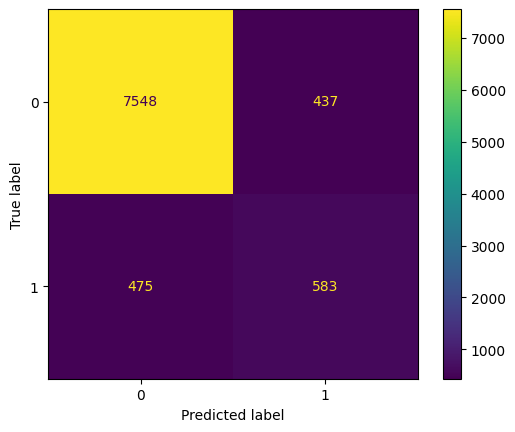

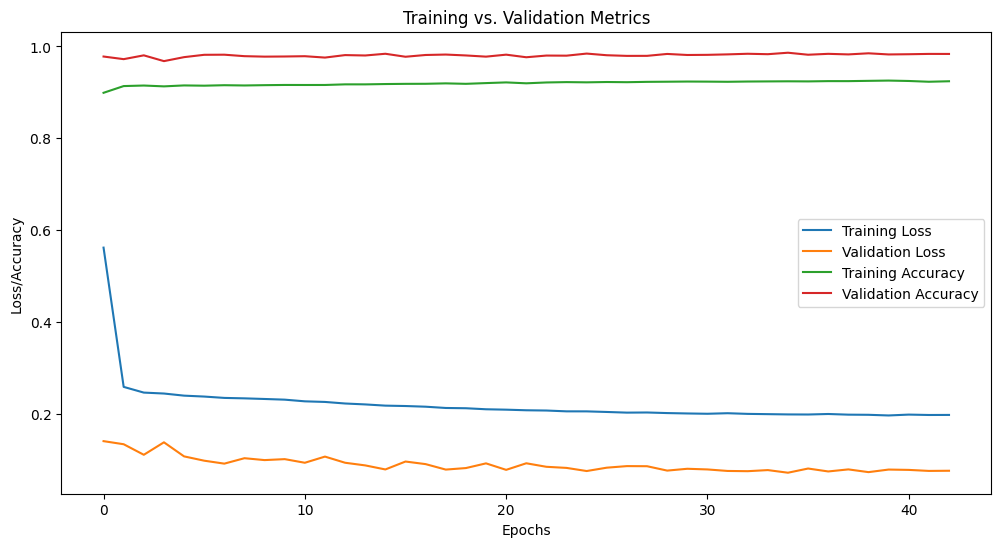

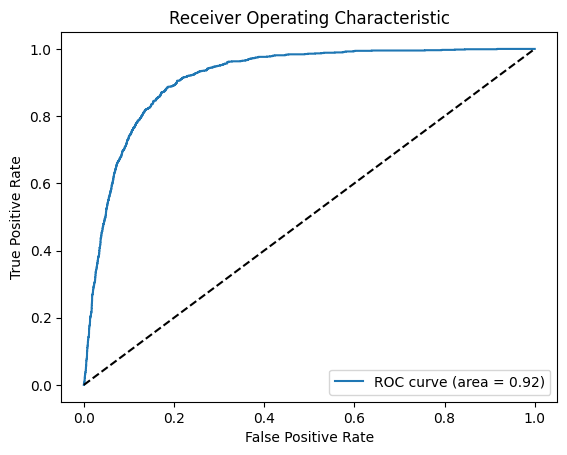

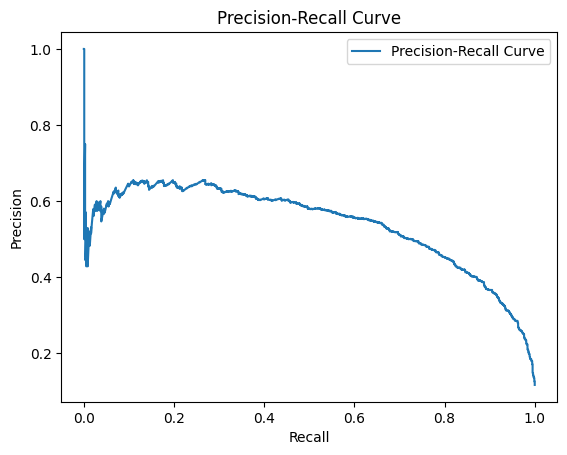

Final Model Performance:
Final Accuracy (Test): 0.8991

** Cross-Validation **

Starting Fold 1...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9176 - Precision: 0.8509 - Recall: 0.7738 - accuracy: 0.8641 - loss: 0.9847 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9814 - val_accuracy: 0.9814 - val_loss: 0.1305 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9686 - Precision: 0.9019 - Recall: 0.8652 - accuracy: 0.9137 - loss: 0.2625 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9718 - val_accuracy: 0.9718 - val_loss: 0.1306 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - AUC: 0.9692 - Precision: 0.9026 - Recall: 0.8616 - accuracy: 0.9131 - loss: 0.2482 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9801 - val_accuracy: 0.9801 - val_loss: 0.1073 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - AUC: 0.9705 - Precision: 0.9021 - Recall: 0.8668 - accuracy: 0.9146 - loss: 0.2432 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.96

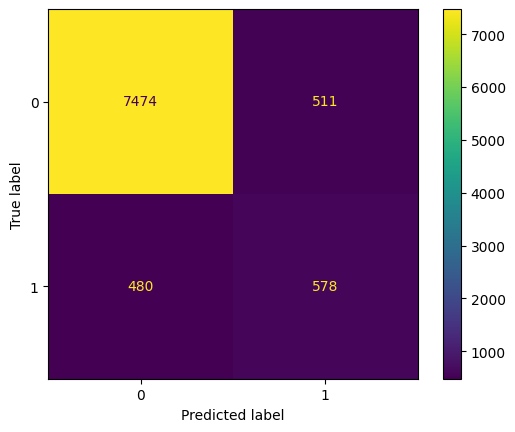

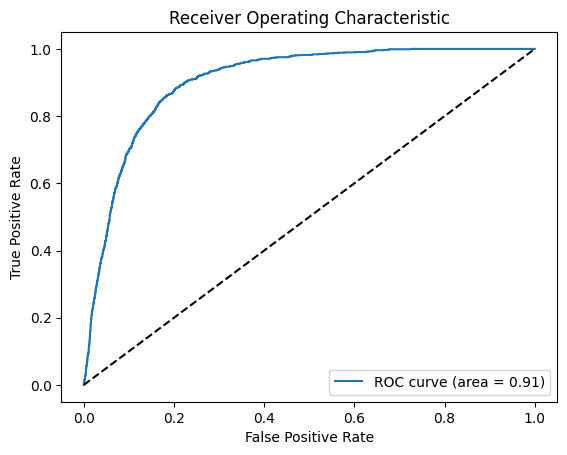

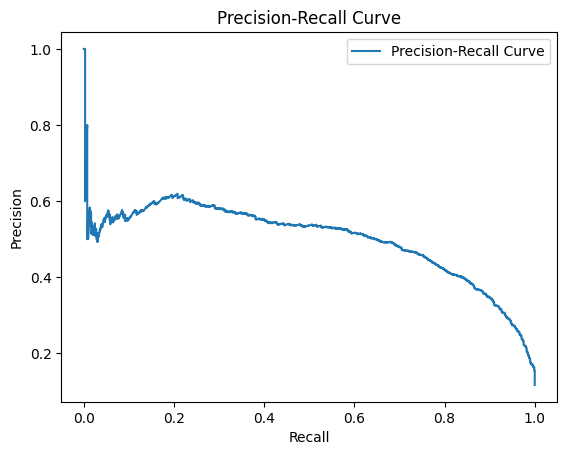


Starting Fold 2...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9220 - Precision: 0.8692 - Recall: 0.7417 - accuracy: 0.8645 - loss: 0.9333 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9793 - val_accuracy: 0.9793 - val_loss: 0.1378 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9690 - Precision: 0.9101 - Recall: 0.8632 - accuracy: 0.9167 - loss: 0.2576 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9742 - val_accuracy: 0.9742 - val_loss: 0.1288 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9703 - Precision: 0.9067 - Recall: 0.8668 - accuracy: 0.9158 - loss: 0.2460 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9797 - val_accuracy: 0.9797 - val_loss: 0.1024 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9695 - Precision: 0.9043 - Recall: 0.8625 - accuracy: 0.9147 - loss: 0.2430 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.98

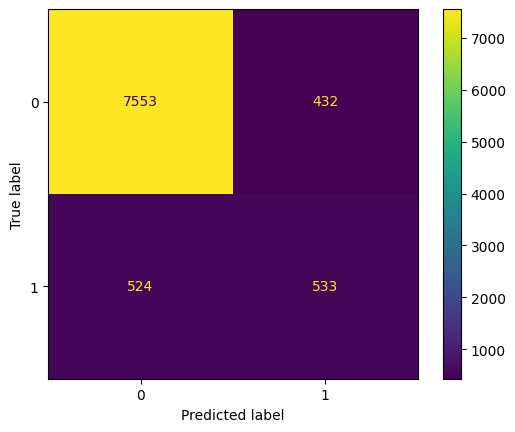

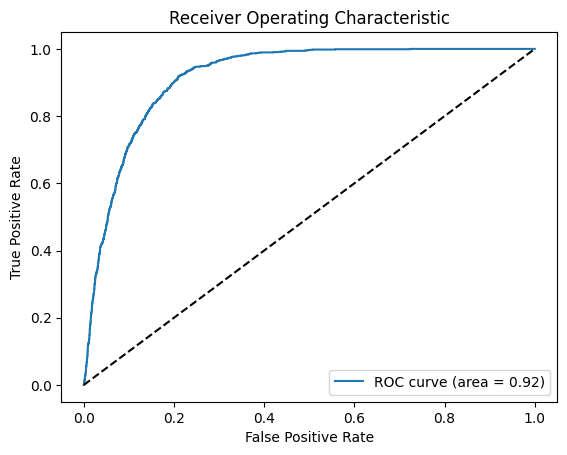

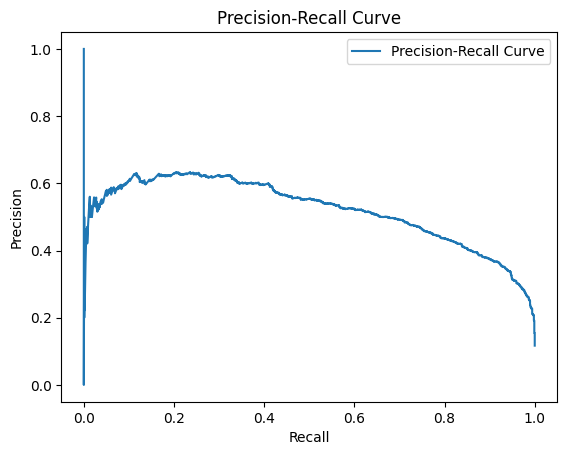


Starting Fold 3...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - AUC: 0.9179 - Precision: 0.8626 - Recall: 0.7435 - accuracy: 0.8624 - loss: 0.9946 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9798 - val_accuracy: 0.9798 - val_loss: 0.1392 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9694 - Precision: 0.9067 - Recall: 0.8638 - accuracy: 0.9141 - loss: 0.2605 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9817 - val_accuracy: 0.9817 - val_loss: 0.1092 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - AUC: 0.9701 - Precision: 0.9013 - Recall: 0.8674 - accuracy: 0.9146 - loss: 0.2466 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9834 - val_accuracy: 0.9834 - val_loss: 0.0996 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9707 - Precision: 0.9007 - Recall: 0.8656 - accuracy: 0.9143 - loss: 0.2410 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.97

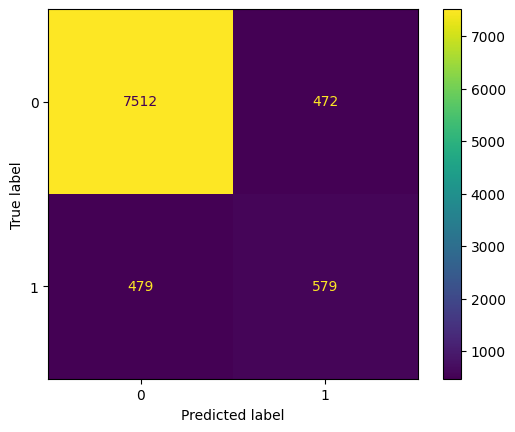

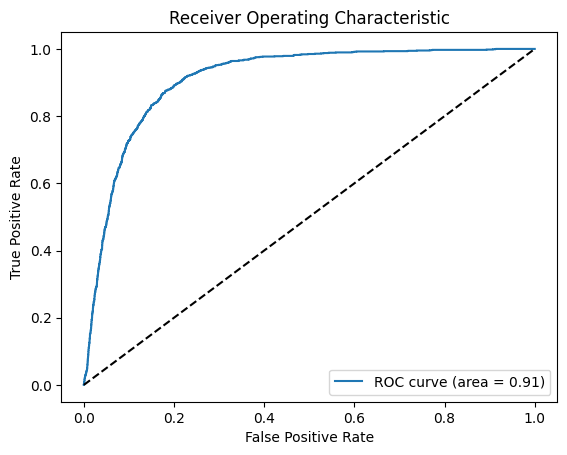

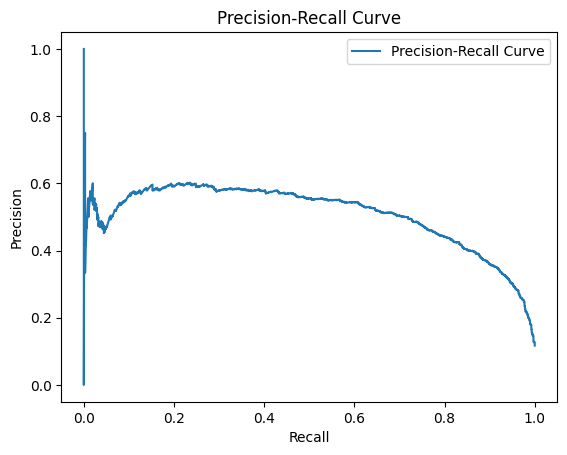


Starting Fold 4...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - AUC: 0.9140 - Precision: 0.8495 - Recall: 0.7426 - accuracy: 0.8542 - loss: 0.9843 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9724 - val_accuracy: 0.9724 - val_loss: 0.1533 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - AUC: 0.9689 - Precision: 0.9041 - Recall: 0.8648 - accuracy: 0.9148 - loss: 0.2604 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9772 - val_accuracy: 0.9772 - val_loss: 0.1206 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.9703 - Precision: 0.9057 - Recall: 0.8647 - accuracy: 0.9160 - loss: 0.2460 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9769 - val_accuracy: 0.9769 - val_loss: 0.1108 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9711 - Precision: 0.9038 - Recall: 0.8666 - accuracy: 0.9159 - loss: 0.2389 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9

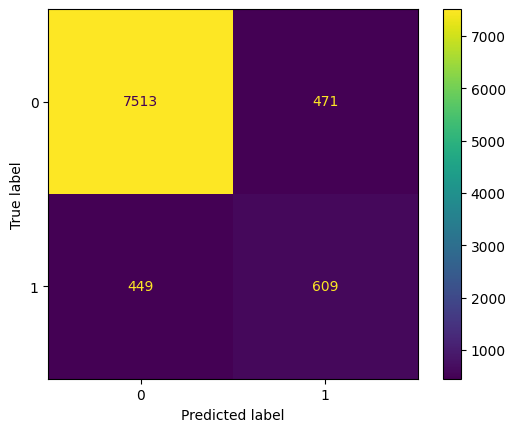

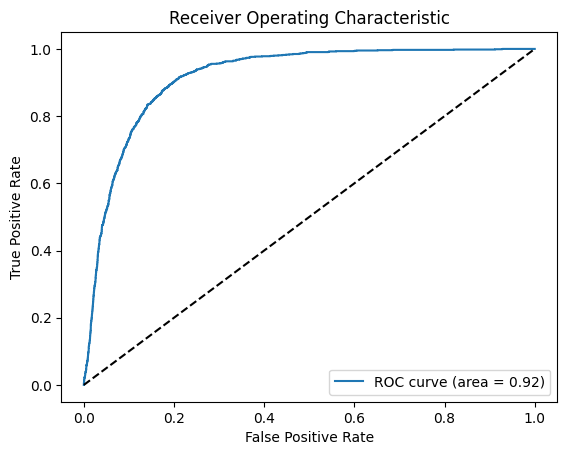

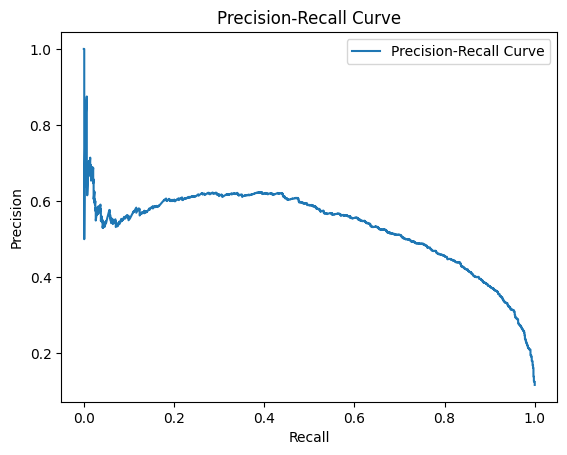


Starting Fold 5...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - AUC: 0.9197 - Precision: 0.8605 - Recall: 0.7492 - accuracy: 0.8621 - loss: 0.9477 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9750 - val_accuracy: 0.9750 - val_loss: 0.1578 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.9699 - Precision: 0.9029 - Recall: 0.8705 - accuracy: 0.9158 - loss: 0.2592 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9764 - val_accuracy: 0.9764 - val_loss: 0.1280 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.9698 - Precision: 0.8988 - Recall: 0.8657 - accuracy: 0.9132 - loss: 0.2474 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9754 - val_accuracy: 0.9754 - val_loss: 0.1197 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - AUC: 0.9711 - Precision: 0.9020 - Recall: 0.8672 - accuracy: 0.9146 - loss: 0.2422 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.97

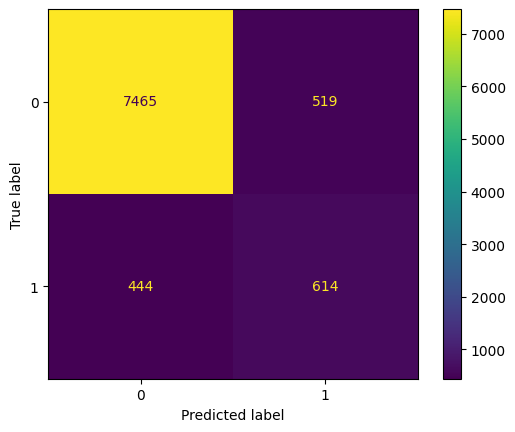

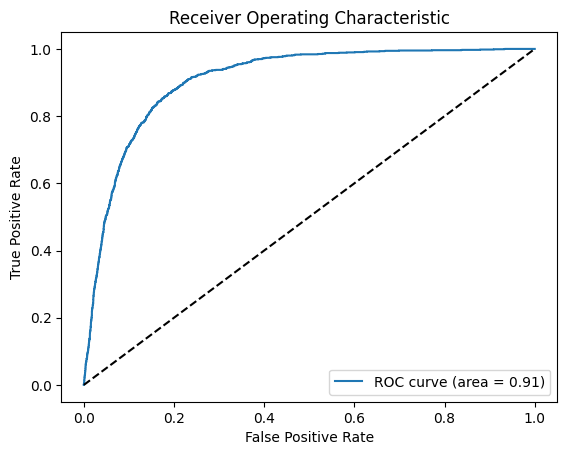

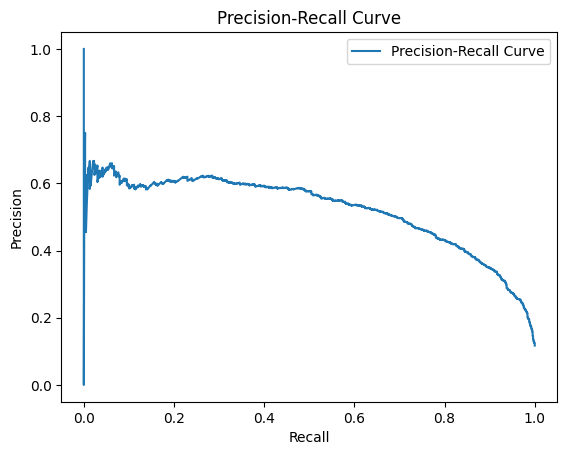


Cross-Validation Results:
Mean Accuracy: 0.8943
Accuracy Std Dev: 0.0025


In [27]:



run_neural_network_workflow(df_encoded, target_column='y')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pref

Epoch 1/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - AUC: 0.9004 - Precision: 0.7961 - Recall: 0.7910 - accuracy: 0.8431 - loss: 1.8369 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9804 - val_accuracy: 0.9804 - val_loss: 0.1692 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.9668 - Precision: 0.8998 - Recall: 0.8503 - accuracy: 0.9085 - loss: 0.2937 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9732 - val_accuracy: 0.9732 - val_loss: 0.1239 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9666 - Precision: 0.8971 - Recall: 0.8468 - accuracy: 0.9050 - loss: 0.2660 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9764 - val_accuracy: 0.9764 - val_loss: 0.1116 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - AUC: 0.9689 - Precision: 0.8997 - Recall: 0.8531 - accuracy: 0.9083 - loss: 0.2555 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_

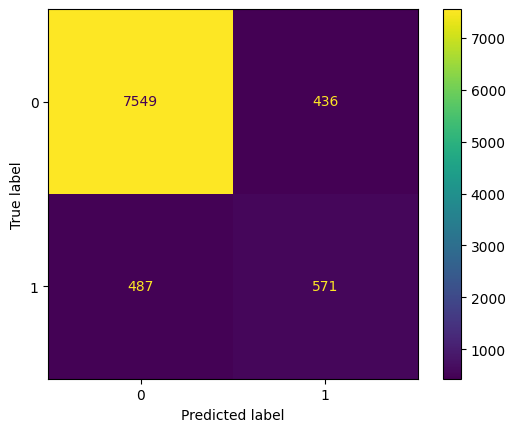

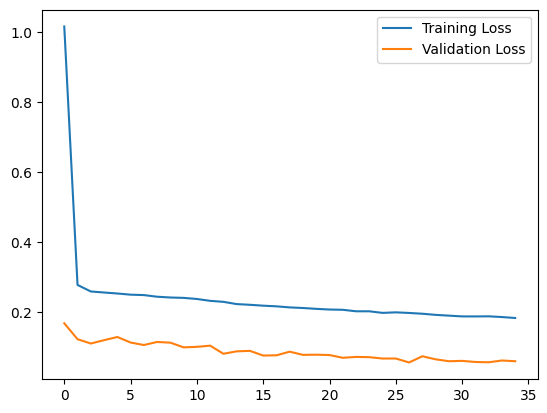

Final Model Performance:
Final Accuracy (Test): 0.8979
Starting Fold 1...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - AUC: 0.9080 - Precision: 0.7966 - Recall: 0.8030 - accuracy: 0.8452 - loss: 1.7395 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9710 - val_accuracy: 0.9710 - val_loss: 0.1733 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9675 - Precision: 0.8966 - Recall: 0.8514 - accuracy: 0.9072 - loss: 0.2816 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9760 - val_accuracy: 0.9760 - val_loss: 0.1174 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.9682 - Precision: 0.8982 - Recall: 0.8524 - accuracy: 0.9081 - loss: 0.2589 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9628 - val_accuracy: 0.9628 - val_loss: 0.1303 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9679 - Precision: 0.9000 - Recall: 0.8460 - accuracy: 0.9076 - loss: 0.2562 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9

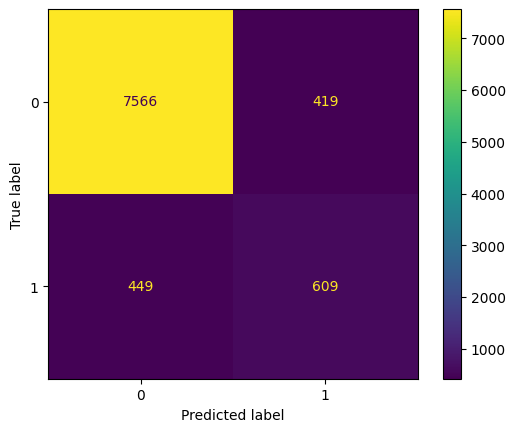

Starting Fold 2...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - AUC: 0.9109 - Precision: 0.7948 - Recall: 0.8127 - accuracy: 0.8485 - loss: 1.7296 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9683 - val_accuracy: 0.9683 - val_loss: 0.1868 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - AUC: 0.9663 - Precision: 0.8919 - Recall: 0.8521 - accuracy: 0.9057 - loss: 0.2872 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9809 - val_accuracy: 0.9809 - val_loss: 0.1146 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.9681 - Precision: 0.9000 - Recall: 0.8513 - accuracy: 0.9079 - loss: 0.2597 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9851 - val_accuracy: 0.9851 - val_loss: 0.0960 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9680 - Precision: 0.8974 - Recall: 0.8502 - accuracy: 0.9071 - loss: 0.2590 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.96

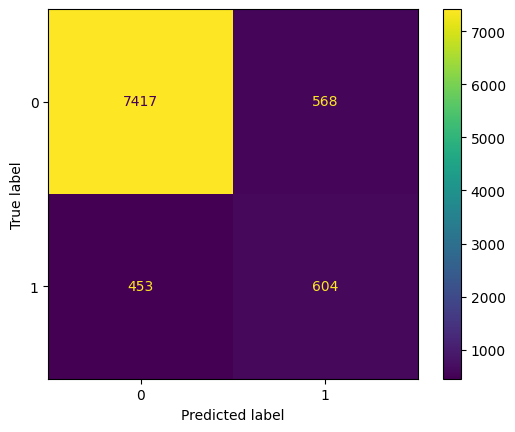

Starting Fold 3...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - AUC: 0.9261 - Precision: 0.8199 - Recall: 0.8235 - accuracy: 0.8649 - loss: 1.6735 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9749 - val_accuracy: 0.9749 - val_loss: 0.1648 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - AUC: 0.9671 - Precision: 0.8972 - Recall: 0.8506 - accuracy: 0.9078 - loss: 0.2836 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9701 - val_accuracy: 0.9701 - val_loss: 0.1563 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - AUC: 0.9682 - Precision: 0.8988 - Recall: 0.8503 - accuracy: 0.9084 - loss: 0.2589 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9710 - val_accuracy: 0.9710 - val_loss: 0.1214 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - AUC: 0.9675 - Precision: 0.8945 - Recall: 0.8503 - accuracy: 0.9054 - loss: 0.2610 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9

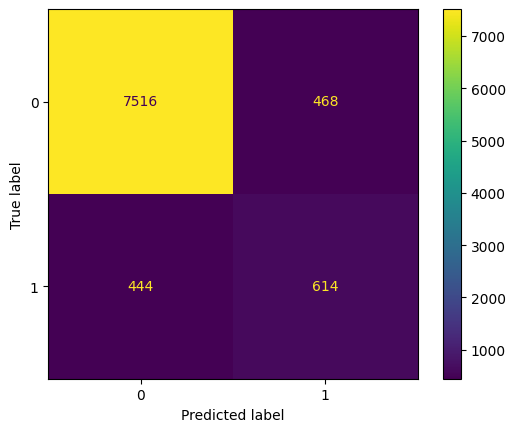

Starting Fold 4...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - AUC: 0.9198 - Precision: 0.7999 - Recall: 0.8288 - accuracy: 0.8543 - loss: 1.6651 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9734 - val_accuracy: 0.9734 - val_loss: 0.1624 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - AUC: 0.9684 - Precision: 0.8970 - Recall: 0.8530 - accuracy: 0.9077 - loss: 0.2789 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9771 - val_accuracy: 0.9771 - val_loss: 0.1099 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - AUC: 0.9675 - Precision: 0.8957 - Recall: 0.8537 - accuracy: 0.9077 - loss: 0.2621 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9785 - val_accuracy: 0.9785 - val_loss: 0.1041 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - AUC: 0.9672 - Precision: 0.8997 - Recall: 0.8509 - accuracy: 0.9082 - loss: 0.2602 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.98

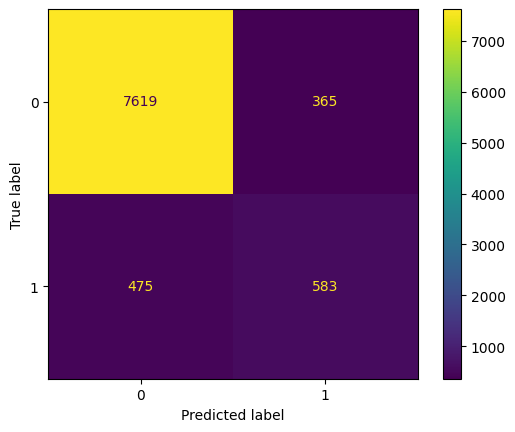

Starting Fold 5...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - AUC: 0.9161 - Precision: 0.7988 - Recall: 0.8210 - accuracy: 0.8520 - loss: 1.7138 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9786 - val_accuracy: 0.9786 - val_loss: 0.1628 - learning_rate: 0.0010
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9673 - Precision: 0.8958 - Recall: 0.8523 - accuracy: 0.9073 - loss: 0.2835 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9768 - val_accuracy: 0.9768 - val_loss: 0.1103 - learning_rate: 0.0010
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - AUC: 0.9690 - Precision: 0.8963 - Recall: 0.8556 - accuracy: 0.9076 - loss: 0.2577 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.9656 - val_accuracy: 0.9656 - val_loss: 0.1313 - learning_rate: 0.0010
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9681 - Precision: 0.9035 - Recall: 0.8496 - accuracy: 0.9094 - loss: 0.2587 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.96

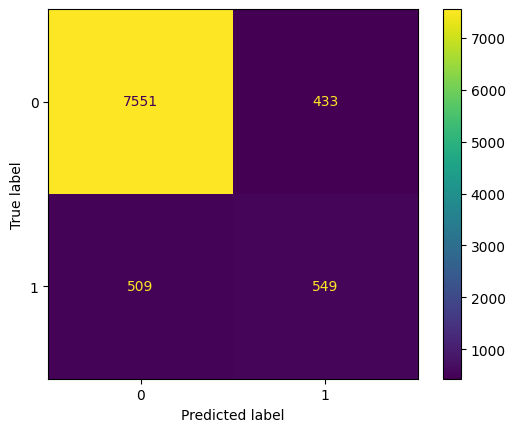

Cross-Validation Accuracy: 0.8986


In [25]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
def build_and_train_neural_network(
    X_train, y_train, neurons_layer1=128, neurons_layer2=64,
    dropout_rate1=0.3, dropout_rate2=0.4, regularization=l2(0.02),
    lr_scheduler=None
):
    """
    Builds and trains a neural network with enhanced regularization.
    """
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Build neural network
    nn_model = Sequential([
        Dense(neurons_layer1, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=regularization),
        BatchNormalization(),
        Dropout(dropout_rate1),
        Dense(neurons_layer2, activation='relu', kernel_regularizer=regularization),
        BatchNormalization(),
        Dropout(dropout_rate2),
        Dense(1, activation='sigmoid')
    ])
    nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

    # Train neural network
    early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
    callbacks = [early_stopping]
    if lr_scheduler:
        callbacks.append(lr_scheduler)

    history = nn_model.fit(
        X_train_scaled, y_train,
        epochs=50, batch_size=64, validation_split=0.2,
        callbacks=callbacks, verbose=1
    )

    return nn_model, scaler, history


def evaluate_neural_network(model, X_test, y_test, scaler, history=None):
    """
    Evaluates the Neural Network and prints classification report.
    """
    X_test_scaled = scaler.transform(X_test)
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = (y_pred_proba > 0.5).astype(int)

    print("Neural Network Classification Report:")
    print(classification_report(y_test, y_pred))

    final_accuracy = accuracy_score(y_test, y_pred)
    print(f"Final Accuracy: {final_accuracy:.4f}")

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

    # Plot training and validation loss
    if history:
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.legend()
        plt.show()

    return final_accuracy


def run_neural_network_workflow(df, target_column='y'):
    """
    Executes the workflow for Neural Network with enhanced regularization and evaluation.
    """
    X, y = split_features_and_target(df, target_column)
    X_train, X_test, y_train, y_test = train_test_split_stratified(X, y)

    # Address class imbalance with SMOTE
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Learning Rate Scheduler
    def scheduler(epoch, lr):
        if epoch < 10:
            return lr
        else:
            return lr * tf.math.exp(-0.1).numpy()

    lr_scheduler = LearningRateScheduler(scheduler)

    # Build and Train Model
    model, scaler, history = build_and_train_neural_network(
        X_train, y_train, lr_scheduler=lr_scheduler
    )

    # Evaluate Model
    final_accuracy = evaluate_neural_network(model, X_test, y_test, scaler, history)

    print("Final Model Performance:")
    print(f"Final Accuracy (Test): {final_accuracy:.4f}")

    # Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []

    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        print(f"Starting Fold {fold}...")
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        X_train_cv, y_train_cv = smote.fit_resample(X_train_cv, y_train_cv)
        model_cv, scaler_cv, _ = build_and_train_neural_network(X_train_cv, y_train_cv, lr_scheduler=lr_scheduler)
        accuracy = evaluate_neural_network(model_cv, X_test_cv, y_test_cv, scaler_cv)
        accuracies.append(accuracy)

    print(f"Cross-Validation Accuracy: {np.mean(accuracies):.4f}")


# Example usage
# Assuming df is a pre-processed DataFrame with a binary target column 'y'
run_neural_network_workflow(df_encoded, target_column='y')


In [4]:

!pip install tensorflow
!pip install keras-tuner
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from kerastuner.tuners import RandomSearch
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


<ipython-input-4-3ac2ccb017be>:10: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


Splitting data into features and target...
Performing train-test split...
Applying SMOTE + Tomek resampling...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTETomek or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.vali

Fine-tuning Random Forest...
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Evaluating the best model on test data...
RF Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7985
           1       0.58      0.49      0.53      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.72      0.74      9043
weighted avg       0.89      0.90      0.90      9043

RF ROC-AUC Score: 0.920414872877193


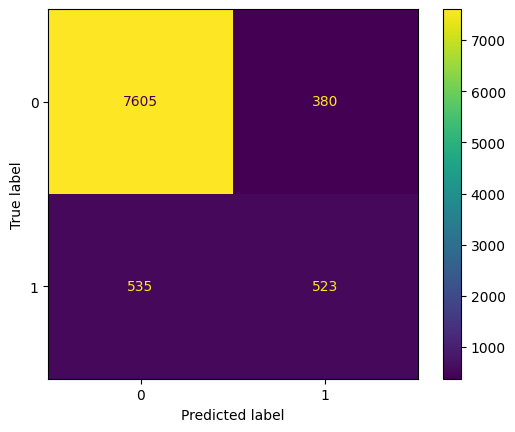

Plotting feature importance...


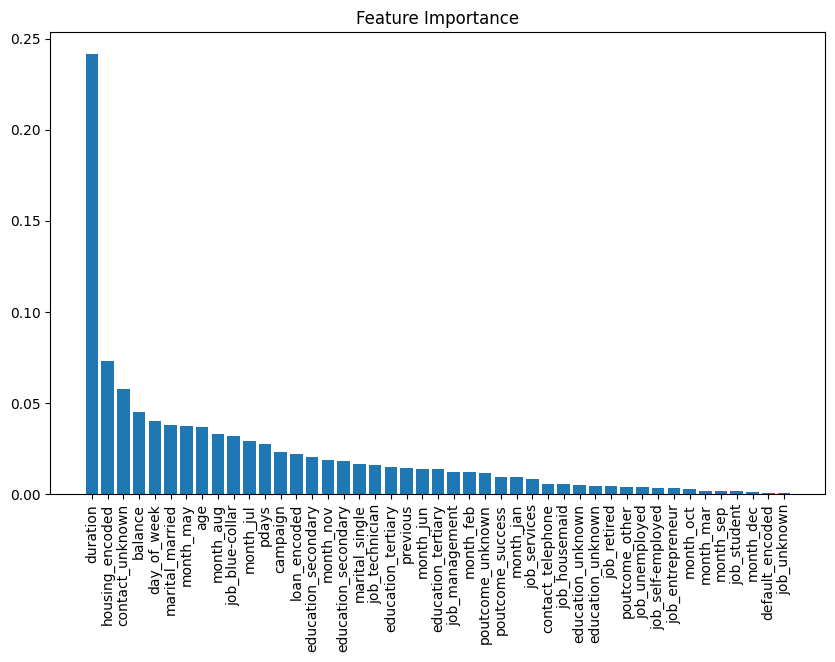

Saving the final model...
Model saved to random_forest_model.pkl


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt

def split_features_and_target(df, target_column):
    """
    Splits the DataFrame into features and target variable.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column].map({'no': 0, 'yes': 1})
    return X, y

def train_test_split_stratified(X, y, test_size=0.2, random_state=42):
    """
    Splits the data into training and testing sets using stratified sampling.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

def apply_smote_tomek(X_train, y_train):
    """
    Applies SMOTE + Tomek Links to the training data to handle class imbalance.
    """
    smote_tomek = SMOTETomek(random_state=42)
    return smote_tomek.fit_resample(X_train, y_train)

def train_random_forest(X_train, y_train):
    """
    Trains a Random Forest classifier.
    """
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model

def evaluate_model(model, X_test, y_test, model_type='rf'):
    """
    Evaluates the model and prints classification report and ROC-AUC score.
    """
    if model_type == 'rf':
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    print(f"{model_type.upper()} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{model_type.upper()} ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

def fine_tune_random_forest(X_train, y_train):
    """
    Fine-tunes the Random Forest classifier using GridSearchCV.
    """
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False]
    }
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

def feature_importance(rf_model, feature_names):
    """
    Plots the feature importance for the Random Forest model.
    """
    importances = rf_model.feature_importances_
    sorted_indices = importances.argsort()[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importances)), importances[sorted_indices])
    plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
    plt.title('Feature Importance')
    plt.show()

def save_model(model, filename='random_forest_model.pkl'):
    """
    Saves the trained model to a file.
    """
    joblib.dump(model, filename)
    print(f"Model saved to {filename}")

def run_random_forest_workflow(df, target_column='y'):
    """
    Executes the workflow for Random Forest including fine-tuning.
    """
    print("Splitting data into features and target...")
    X, y = split_features_and_target(df, target_column)

    print("Performing train-test split...")
    X_train, X_test, y_train, y_test = train_test_split_stratified(X, y)

    print("Applying SMOTE + Tomek resampling...")
    X_train_resampled, y_train_resampled = apply_smote_tomek(X_train, y_train)

    print("Fine-tuning Random Forest...")
    rf_best_model, best_params = fine_tune_random_forest(X_train_resampled, y_train_resampled)
    print("Best Parameters:", best_params)

    print("Evaluating the best model on test data...")
    evaluate_model(rf_best_model, X_test, y_test, model_type='rf')

    print("Plotting feature importance...")
    feature_importance(rf_best_model, X.columns)

    print("Saving the final model...")
    save_model(rf_best_model)

# Example usage:
if __name__ == "__main__":

    run_random_forest_workflow(df_encoded, target_column='y')
